<a href="https://colab.research.google.com/github/lostfootage/kim-nava-AI-portfolio/blob/main/final_newsbot_intelligence_system_group_5_itai2373.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 NewsBot Intelligence System
## ITAI 2373 - Mid-Term Group Project Template

**Team Members:** [Franck Kolontchang - Iman Haamid - Kimberly Navarrete - Marvin Azuogu]

**Date:** [8/07/2025]

**GitHub Repository:** [https://github.com/imid12/miniature-eureka-Group5/tree/main]

---

## 🎯 Project Overview

Welcome to your NewsBot Intelligence System! This notebook will guide you through building a comprehensive NLP system that:

- 📰 **Processes** news articles with advanced text cleaning
- 🏷️ **Classifies** articles into categories (Politics, Sports, Technology, Business, Entertainment, Health)
- 🔍 **Extracts** named entities (people, organizations, locations, dates, money)
- 😊 **Analyzes** sentiment and emotional tone
- 📊 **Generates** insights for business intelligence

### 📚 Module Integration Checklist
- [ ] **Module 1:** NLP applications and real-world context
- [ ] **Module 2:** Text preprocessing pipeline
- [ ] **Module 3:** TF-IDF feature extraction
- [ ] **Module 4:** POS tagging analysis
- [ ] **Module 5:** Syntax parsing and semantic analysis
- [ ] **Module 6:** Sentiment and emotion analysis
- [ ] **Module 7:** Text classification system
- [ ] **Module 8:** Named Entity Recognition

---

## 📦 Setup and Installation

Let's start by installing and importing all the libraries we'll need for our NewsBot system.

In [ ]:
# Install required packages (run this cell first!)
!pip install spacy scikit-learn nltk pandas matplotlib seaborn wordcloud plotly
!python -m spacy download en_core_web_sm
# Uninstall conflicting libraries
!pip uninstall -y httpx httpcore h11
# Install googletrans for translation
!pip install googletrans==4.0.0-rc1


# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng') # Add this line to download the specific resource

print("✅ All packages installed successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 89.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Found existing installation: httpx 0.28.1
Uninstalling httpx-0.28.1:
  Successfully uninstalled httpx-0.28.1
Found existing installation: httpcore 1.0.9
Uninstalling httpcore-1.0.9:
  Successfully uninstalled httpcore-1.0.9
Found existing installation: h11 0.16.0
Uninstalling h11-0.16.0:
  Successfully uninstalled h11-0.16.0
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...


✅ All packages installed successfully!


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [ ]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter, defaultdict
import re
import warnings
warnings.filterwarnings('ignore')

# NLP Libraries
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tag import pos_tag

# Scikit-learn for machine learning
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("📚 All libraries imported successfully!")
print(f"🔧 spaCy model loaded: {nlp.meta['name']} v{nlp.meta['version']}")

📚 All libraries imported successfully!
🔧 spaCy model loaded: core_web_sm v3.8.0


## 📊 Data Loading and Exploration

### 🎯 Module 1: Understanding Our NLP Application

Before we dive into the technical implementation, let's understand the real-world context of our NewsBot Intelligence System. This system addresses several business needs:

1. **Media Monitoring:** Automatically categorize and track news coverage
2. **Business Intelligence:** Extract key entities and sentiment trends
3. **Content Management:** Organize large volumes of news content
4. **Market Research:** Understand public sentiment about topics and entities

**💡 Discussion Question:** What other real-world applications can you think of for this type of system? Consider different industries and use cases.

In [ ]:
# Load your dataset
# 💡 TIP: If using the provided dataset, upload it to Colab first
# 💡 TIP: You can also use sample datasets like BBC News or 20 Newsgroups

# Option 1: Load provided dataset
# df = pd.read_csv('news_dataset.csv')

# Option 2: Load BBC News dataset (if using alternative)
# You can download this from: https://www.kaggle.com/c/learn-ai-bbc/data

# Option 3: Create sample data for testing (remove this when you have real data)

# Dataset from the GitHub repo
df = pd.read_csv('https://raw.githubusercontent.com/imid12/miniature-eureka-Group5/refs/heads/main/ITAI2373-NewsBot-Midterm/datasets/BBC%20News%20Train.csv')
# df = pd.DataFrame(sample_data)

print(f"📊 Dataset loaded successfully!")
print(f"📈 Shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")

# Display first few rows
df.head()

📊 Dataset loaded successfully!
📈 Shape: (1490, 3)
📋 Columns: ['ArticleId', 'Text', 'Category']


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


📊 DATASET OVERVIEW
Total articles: 1490
Unique categories: 5
Categories: ['business', 'tech', 'politics', 'sport', 'entertainment']

🔍 MISSING VALUES CHECK
Missing values per column:
Series([], dtype: int64)
No missing values found in the dataset.

📝 TEXT LENGTH DISTRIBUTION
count     1490.000000
mean      2233.461745
std       1205.153358
min        501.000000
25%       1453.000000
50%       1961.000000
75%       2751.250000
max      18387.000000
Name: Text_Length, dtype: float64


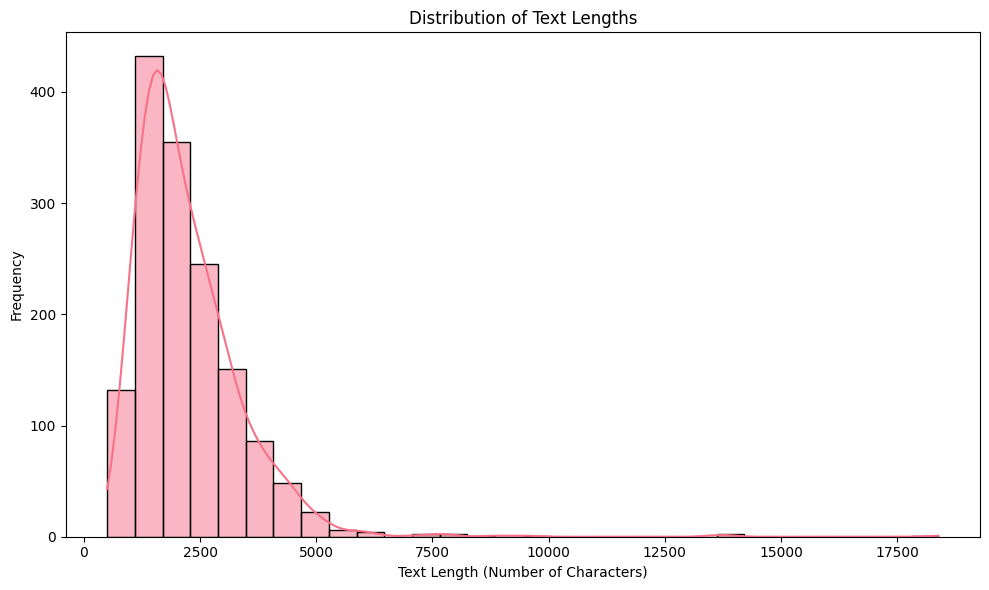


🧹 DATA QUALITY ISSUES (Beyond Missing Values)
Found 50 duplicate articles based on 'Text' content:
Text
ask jeeves joins web log market ask jeeves has bought the bloglines website to improve the way it handles content from web journals or blogs.  the bloglines site has become hugely popular as it gives users one place in which to read  search and share all the blogs they are interested in. ask jeeves said it was not planning to change bloglines but would use the 300 million articles it has archived to round out its index of the web. how much ask jeeves paid for bloglines was not revealed.  bloglines has become popular because it lets users build a list of the blogs they want to follow without having to visit each journal site individually. to do this it makes use of a technology known as really simple syndication (rss) that many blogs have adopted to let other sites know when new entries are made on their journals. the acquisition follows similar moves by other search sites. google ac

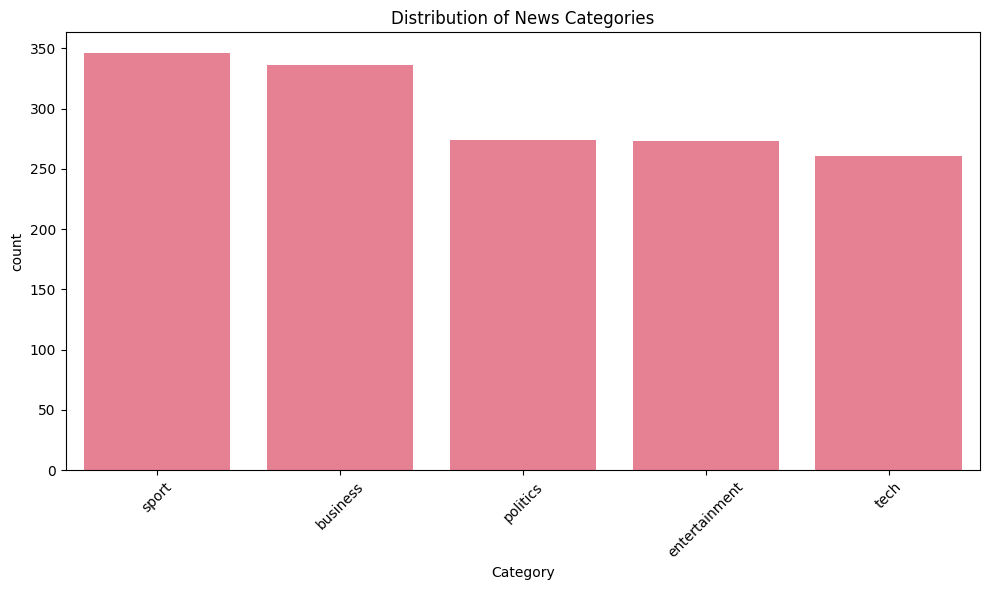

In [ ]:
# Basic dataset exploration
print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Total articles: {len(df)}")
print(f"Unique categories: {df['Category'].nunique()}")
print(f"Categories: {df['Category'].unique().tolist()}")
# The loaded dataset does not have 'date' or 'source' columns, so these lines are commented out.
# print(f"Date range: {df['date'].min()} to {df['date'].max()}")
# print(f"Unique sources: {df['source'].nunique()}")

# --- Added: Missing Values Check ---
print("\n🔍 MISSING VALUES CHECK")
print("=" * 50)
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0]) # Only show columns with missing values

if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print(f"\nTotal missing values: {missing_values.sum()}")
    print("Consider handling these missing values (e.g., imputation, removal) before further analysis.")

# --- Analyze Text Length Distribution ---
print("\n📝 TEXT LENGTH DISTRIBUTION")
print("=" * 50)
if 'Text' in df.columns:
    # Ensure 'Text' column is string type and handle potential NaNs before calculating length
    df['Text_Length'] = df['Text'].astype(str).apply(len)

    print(df['Text_Length'].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(df['Text_Length'], bins=30, kde=True)
    plt.title('Distribution of Text Lengths')
    plt.xlabel('Text Length (Number of Characters)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("No 'Text' column found to analyze text length.")

# --- Examine Source Distribution ---
# print("\n📰 SOURCE DISTRIBUTION")
# print("=" * 50)
# if 'Source' in df.columns:
#     source_counts = df['Source'].value_counts()
#     print(source_counts)

#     plt.figure(figsize=(10, 6))
#     sns.countplot(data=df, x='Source', order=source_counts.index)
#     plt.title('Distribution of News Sources')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()
# else:
#     print("No 'Source' column found to analyze source distribution.")

# --- Look for any data quality issues (beyond just missing values) ---
print("\n🧹 DATA QUALITY ISSUES (Beyond Missing Values)")
print("=" * 50)

# 1. Duplicate Articles (based on 'Text' content)
if 'Text' in df.columns:
    duplicate_texts = df[df.duplicated(subset=['Text'], keep=False)].sort_values(by='Text')
    if not duplicate_texts.empty:
        print(f"Found {len(duplicate_texts) // 2} duplicate articles based on 'Text' content:")
        # Displaying only unique duplicate texts for brevity
        print(duplicate_texts['Text'].value_counts())
        print("Consider removing duplicates if they are exact copies and not legitimate repeated content.")
    else:
        print("No exact duplicate articles found based on 'Text' content.")
else:
    print("Cannot check for duplicate articles without a 'Text' column.")

# 2. Inconsistent Formatting/Typos (simple example for 'Category' and 'Text')
# For 'Category': check for inconsistent casing or extra spaces
if 'Category' in df.columns:
    cleaned_categories = df['Category'].str.strip().str.lower().unique().tolist()
    original_categories = df['Category'].dropna().unique().tolist()
    if len(cleaned_categories) < len(original_categories):
        print(f"\nPotential inconsistent category entries (e.g., casing, extra spaces):")
        print(f"Original unique categories: {original_categories}")
        print(f"Cleaned unique categories (lowercase, stripped): {cleaned_categories}")
    else:
        print("\nCategory names appear consistent (checked for casing and leading/trailing spaces).")

# For 'Text': A simple check for common typos or odd characters (very basic, NLP would be better)
if 'Text' in df.columns:
    # Example: Check for entries that might be too short or look like placeholders
    short_texts = df[df['Text_Length'] < 20] # Define a threshold for "too short"
    if not short_texts.empty:
        print(f"\nArticles with unusually short text (less than 20 characters):")
        print(short_texts[['ArticleId', 'Text_Length', 'Text']]) # Changed 'Article' to 'ArticleId'
        print("These might be placeholders, errors, or very brief entries.")

    # You could add more sophisticated checks here, e.g.,
    # - Using regex to find non-alphanumeric characters that shouldn't be there
    # - Checking for very long words or unusual character patterns
    # - For specific domains, checking for missing keywords or structured elements

# 3. Outliers in Text Length (already partially covered by histogram, but numerical check)
if 'Text_Length' in df.columns:
    q1 = df['Text_Length'].quantile(0.25)
    q3 = df['Text_Length'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_texts = df[(df['Text_Length'] < lower_bound) | (df['Text_Length'] > upper_bound)]
    if not outlier_texts.empty:
        print(f"\nArticles with text lengths considered outliers (using IQR method):")
        print(outlier_texts[['ArticleId', 'Text_Length', 'Category']].sort_values(by='Text_Length')) # Changed 'Article' to 'ArticleId'
        print(f"Thresholds: Lower bound={lower_bound:.2f}, Upper bound={upper_bound:.2f}")
    else:
        print("\nNo significant text length outliers detected (using IQR method).")




print("\n📈 CATEGORY DISTRIBUTION")
print("=" * 50)
category_counts = df['Category'].value_counts()
print(category_counts)

# Visualize category distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=category_counts.index)
plt.title('Distribution of News Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 💡 STUDENT TASK: Add your own exploratory analysis here
# - Check for missing values
# - Analyze text length distribution
# - Examine source distribution
# - Look for any data quality issues

## 🧹 Text Preprocessing Pipeline

### 🎯 Module 2: Advanced Text Preprocessing

Now we'll implement a comprehensive text preprocessing pipeline that cleans and normalizes our news articles. This is crucial for all downstream NLP tasks.

**Key Preprocessing Steps:**
1. **Text Cleaning:** Remove HTML, URLs, special characters
2. **Tokenization:** Split text into individual words
3. **Normalization:** Convert to lowercase, handle contractions
4. **Stop Word Removal:** Remove common words that don't carry meaning
5. **Lemmatization:** Reduce words to their base form

**💡 Think About:** Why is preprocessing so important? What happens if we skip these steps?

In [ ]:
# Initialize preprocessing tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Comprehensive text cleaning function

    💡 TIP: This function should handle:
    - HTML tags and entities
    - URLs and email addresses
    - Special characters and numbers
    - Extra whitespace
    """
    if pd.isna(text):
        return ""

    # Convert to string and lowercase
    text = str(text).lower()

    # 🚀 YOUR CODE HERE: Implement text cleaning
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove special characters and digits (keep only letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def preprocess_text(text, remove_stopwords=True, lemmatize=True):
    """
    Complete preprocessing pipeline

    💡 TIP: This function should:
    - Clean the text
    - Tokenize into words
    - Remove stop words (optional)
    - Lemmatize words (optional)
    - Return processed text
    """
    # Clean text
    text = clean_text(text)

    if not text:
        return ""

    # 🚀 YOUR CODE HERE: Implement tokenization and preprocessing
    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words if requested
    if remove_stopwords:
        tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize if requested
    if lemmatize:
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Filter out very short words
    tokens = [token for token in tokens if len(token) > 2]

    return ' '.join(tokens)

# Test the preprocessing function
sample_text = "Apple Inc. announced record quarterly earnings today! Visit https://apple.com for more info. #TechNews"
print("Original text:")
print(sample_text)
print("\nCleaned text:")
print(clean_text(sample_text))
print("\nFully preprocessed text:")
print(preprocess_text(sample_text))

Original text:
Apple Inc. announced record quarterly earnings today! Visit https://apple.com for more info. #TechNews

Cleaned text:
apple inc announced record quarterly earnings today visit for more info technews

Fully preprocessed text:
apple inc announced record quarterly earnings today visit info technews


In [ ]:
# Apply preprocessing to the dataset
print("🧹 Preprocessing all articles...")

# Create new columns for processed text
# The loaded dataset does not have 'title' or 'content' columns, use 'Text' instead.
df['text_clean'] = df['Text'].apply(clean_text)
df['text_processed'] = df['Text'].apply(preprocess_text)


# Combine title and content for full article analysis
# Since there is no title column, just use the 'Text' column
df['full_text'] = df['Text']
df['full_text_processed'] = df['full_text'].apply(preprocess_text)


print("✅ Preprocessing complete!")

# Show before and after examples
print("\n📝 BEFORE AND AFTER EXAMPLES")
print("=" * 60)
for i in range(min(3, len(df))):
    print(f"\nExample {i+1}:")
    print(f"Original: {df.iloc[i]['full_text'][:100]}...")
    print(f"Processed: {df.iloc[i]['full_text_processed'][:100]}...")

print("\n📊 TEXT STATISTICS")
print("=" * 60)

# - Calculate average text length before and after
df['original_text_length'] = df['full_text'].apply(len)
df['processed_text_length'] = df['full_text_processed'].apply(len)

avg_original_length = df['original_text_length'].mean()
avg_processed_length = df['processed_text_length'].mean()

print(f"Average text length (Original): {avg_original_length:.2f} characters")
print(f"Average text length (Processed): {avg_processed_length:.2f} characters")

# - Count unique words before and after
from collections import Counter
import re # Import regex module for tokenization for original text

# Function to tokenize text for unique word counting (simple split for original)
def simple_tokenize(text):
    return re.findall(r'\b\w+\b', text.lower()) # Find words, convert to lower for consistent counting

all_original_words = []
for text in df['full_text']:
    all_original_words.extend(simple_tokenize(text))

all_processed_words = []
for text in df['full_text_processed']:
    # Assuming preprocess_text output is space-separated words, split it
    all_processed_words.extend(text.split())

unique_words_original = len(set(all_original_words))
unique_words_processed = len(set(all_processed_words))

print(f"\nUnique words (Original): {unique_words_original}")
print(f"Unique words (Processed): {unique_words_processed}")


# - Identify the most common words after preprocessing
# We already have all_processed_words from the unique word counting step
word_counts = Counter(all_processed_words)

print("\nMost common words (after preprocessing):")
for word, count in word_counts.most_common(10): # Get top 10 most common words
    print(f"- '{word}': {count}")



# 💡 STUDENT TASK: Analyze the preprocessing results
# - Calculate average text length before and after
# - Count unique words before and after
# - Identify the most common words after preprocessing

🧹 Preprocessing all articles...
✅ Preprocessing complete!

📝 BEFORE AND AFTER EXAMPLES

Example 1:
Original: worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a ba...
Processed: worldcom exboss launch defence lawyer defending former worldcom chief bernie ebbers battery fraud ch...

Example 2:
Original: german business confidence slides german business confidence fell in february knocking hopes of a sp...
Processed: german business confidence slide german business confidence fell february knocking hope speedy recov...

Example 3:
Original: bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service ...
Processed: bbc poll indicates economic gloom citizen majority nation surveyed bbc world service poll believe wo...

📊 TEXT STATISTICS
Average text length (Original): 2233.46 characters
Average text length (Processed): 1481.36 characters

Unique words (Original): 24782
Unique words (Processed): 22486

Mos

## 📊 Feature Extraction and Statistical Analysis

### 🎯 Module 3: TF-IDF Analysis

Now we'll extract numerical features from our text using TF-IDF (Term Frequency-Inverse Document Frequency). This technique helps us identify the most important words in each document and across the entire corpus.

**TF-IDF Key Concepts:**
- **Term Frequency (TF):** How often a word appears in a document
- **Inverse Document Frequency (IDF):** How rare a word is across all documents
- **TF-IDF Score:** TF × IDF - balances frequency with uniqueness

**💡 Business Value:** TF-IDF helps us identify the most distinctive and important terms for each news category.

In [ ]:
# Create TF-IDF vectorizer
# 💡 TIP: Experiment with different parameters:
# - max_features: limit vocabulary size
# - ngram_range: include phrases (1,1) for words, (1,2) for words+bigrams
# - min_df: ignore terms that appear in less than min_df documents
# - max_df: ignore terms that appear in more than max_df fraction of documents

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Limit vocabulary for computational efficiency
    ngram_range=(1, 2),  # Include unigrams and bigrams
    min_df=2,  # Ignore terms that appear in less than 2 documents
    max_df=0.8  # Ignore terms that appear in more than 80% of documents
)

# Fit and transform the processed text
print("🔢 Creating TF-IDF features...")
tfidf_matrix = tfidf_vectorizer.fit_transform(df['full_text_processed'])
feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"✅ TF-IDF matrix created!")
print(f"📊 Shape: {tfidf_matrix.shape}")
print(f"📝 Vocabulary size: {len(feature_names)}")
print(f"🔢 Sparsity: {(1 - tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])) * 100:.2f}%")

# Convert to DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df['Category'] = df['Category'].values # Changed 'category' to 'Category'

print("\n🔍 Sample TF-IDF features:")
print(tfidf_df.iloc[:3, :10])  # Show first 3 rows and 10 features

🔢 Creating TF-IDF features...
✅ TF-IDF matrix created!
📊 Shape: (1490, 5000)
📝 Vocabulary size: 5000
🔢 Sparsity: 97.50%

🔍 Sample TF-IDF features:
   abbas  abc  ability  able  abroad  absence  absolute  absolutely  abuse  \
0    0.0  0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   
1    0.0  0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   
2    0.0  0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   

   abused  
0     0.0  
1     0.0  
2     0.0  


🏷️ TOP TF-IDF TERMS BY CATEGORY

📰 BUSINESS:
  firm: 0.0390
  company: 0.0372
  market: 0.0344
  bank: 0.0336
  year: 0.0335
  growth: 0.0332
  economy: 0.0317
  sale: 0.0316
  share: 0.0307
  profit: 0.0274

📰 TECH:
  mobile: 0.0514
  phone: 0.0473
  people: 0.0458
  technology: 0.0411
  game: 0.0382
  user: 0.0378
  service: 0.0369
  software: 0.0366
  computer: 0.0330
  net: 0.0308

📰 POLITICS:
  labour: 0.0648
  election: 0.0605
  blair: 0.0558
  party: 0.0538
  tory: 0.0463
  would: 0.0456
  government: 0.0456
  minister: 0.0427
  brown: 0.0384
  tax: 0.0330

📰 SPORT:
  game: 0.0448
  england: 0.0374
  win: 0.0341
  player: 0.0322
  match: 0.0304
  champion: 0.0293
  cup: 0.0278
  team: 0.0259
  chelsea: 0.0255
  injury: 0.0249

📰 ENTERTAINMENT:
  film: 0.0996
  award: 0.0524
  best: 0.0460
  show: 0.0376
  star: 0.0372
  music: 0.0357
  band: 0.0349
  actor: 0.0335
  year: 0.0300
  album: 0.0290

📈 VISUALIZATIONS OF TF-IDF ANALYSIS

☁️ Generating Word Clouds per Category...


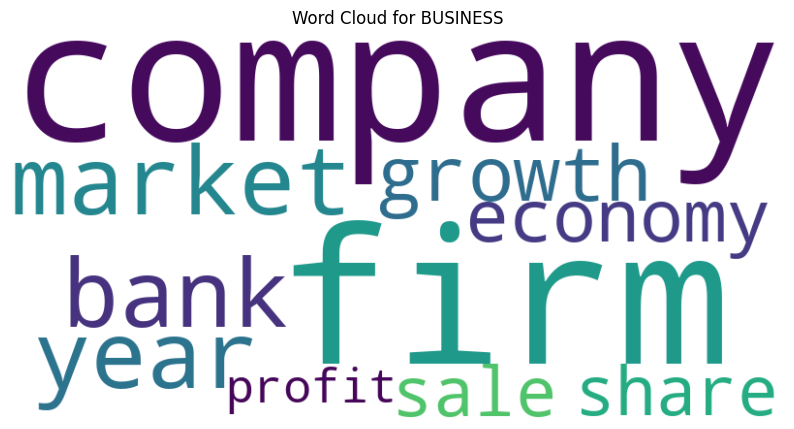

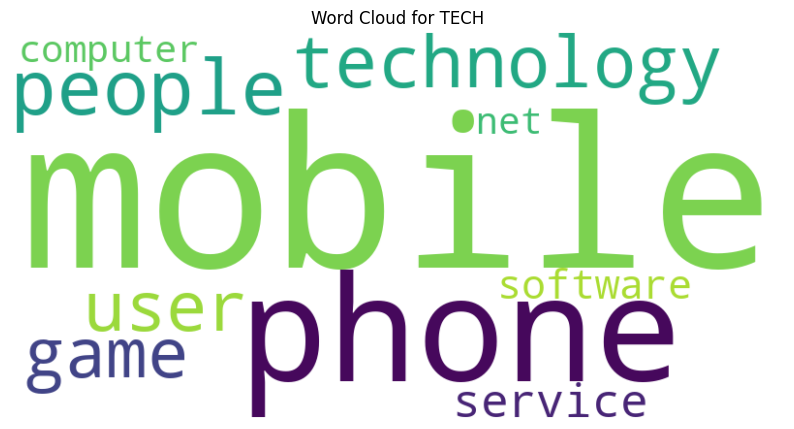

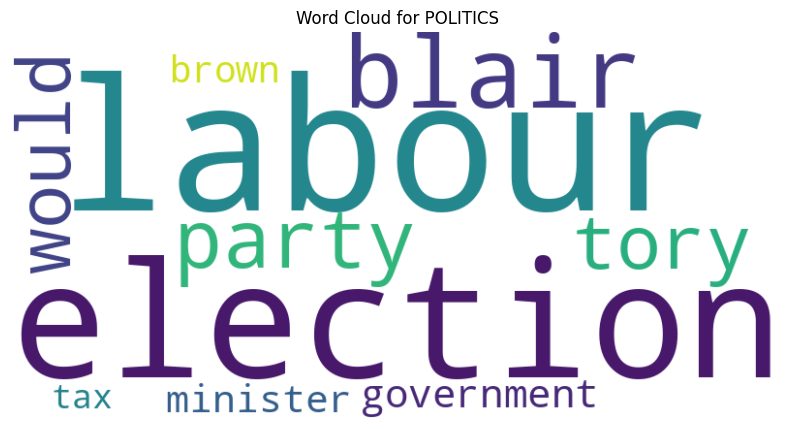

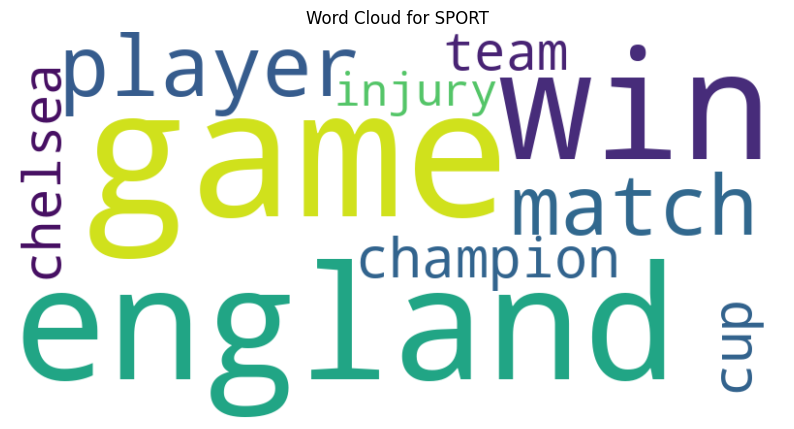

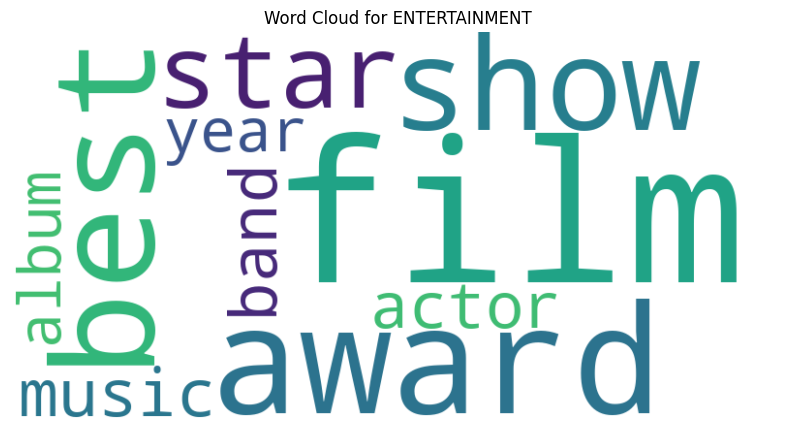

✅ Word Clouds generated!

📊 Generating Bar Charts of Top Terms per Category...


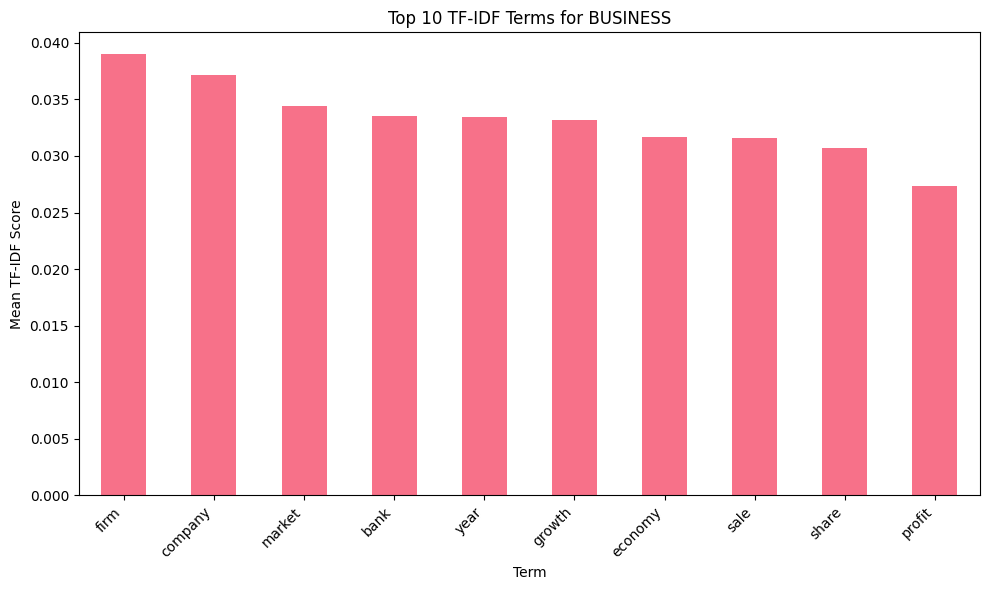

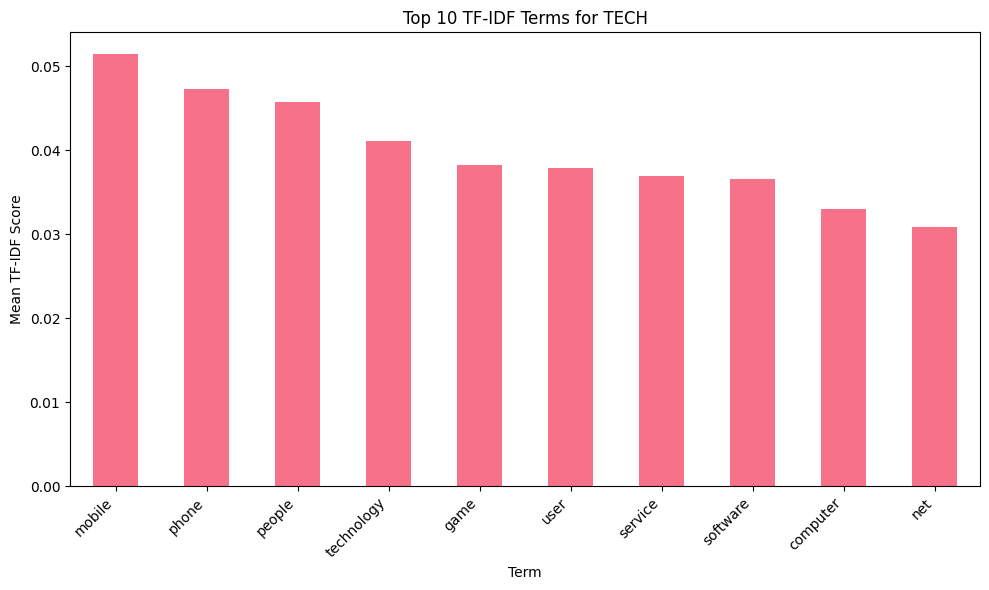

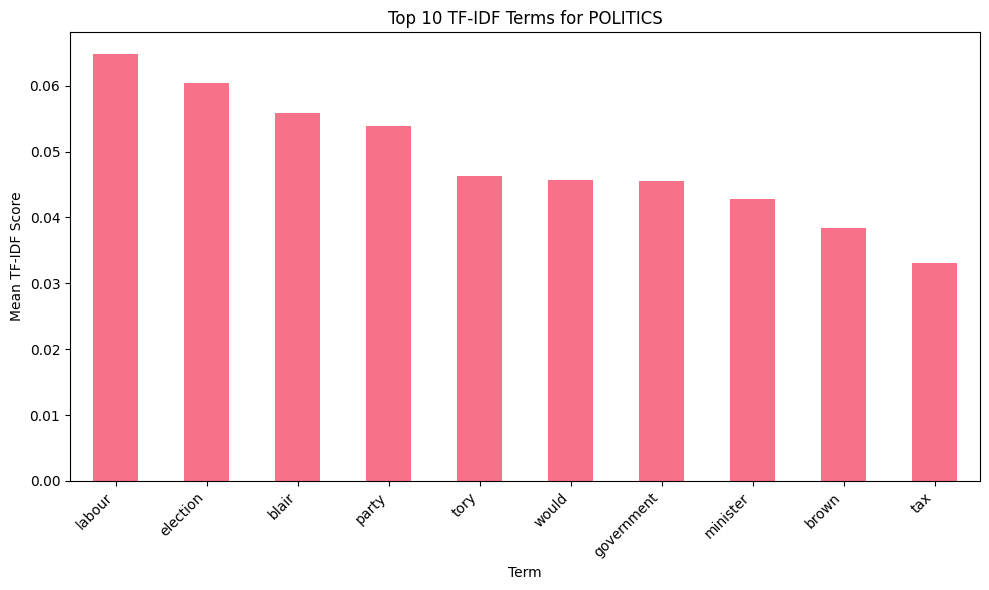

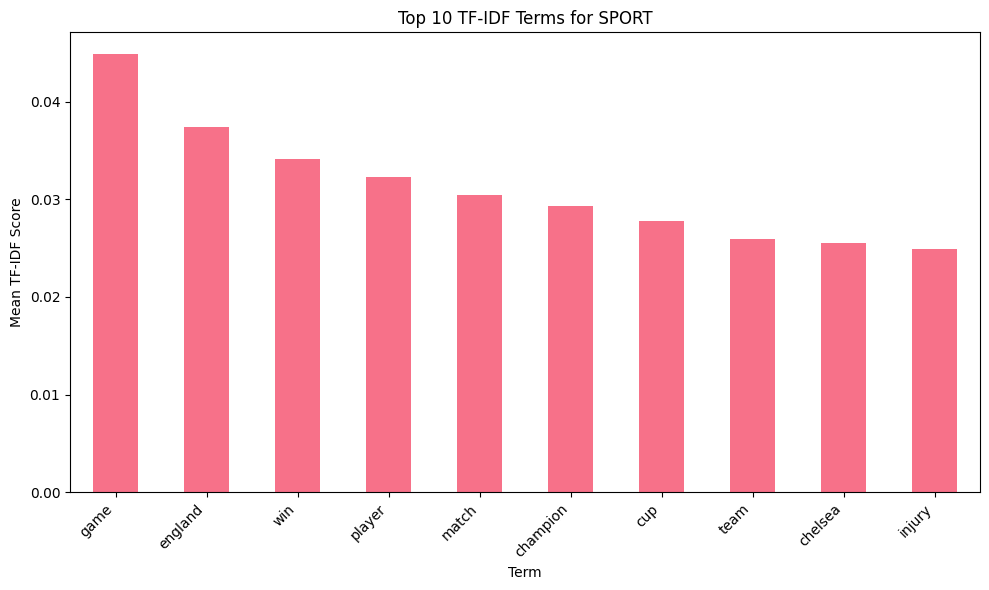

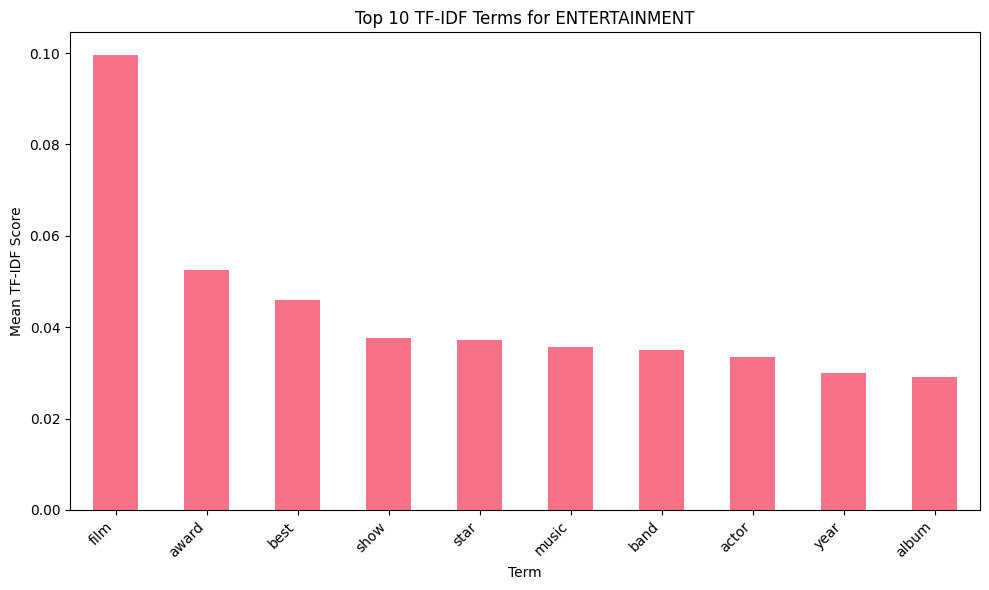

✅ Bar Charts generated!

🔥 Generating Heatmap of Term Importance...


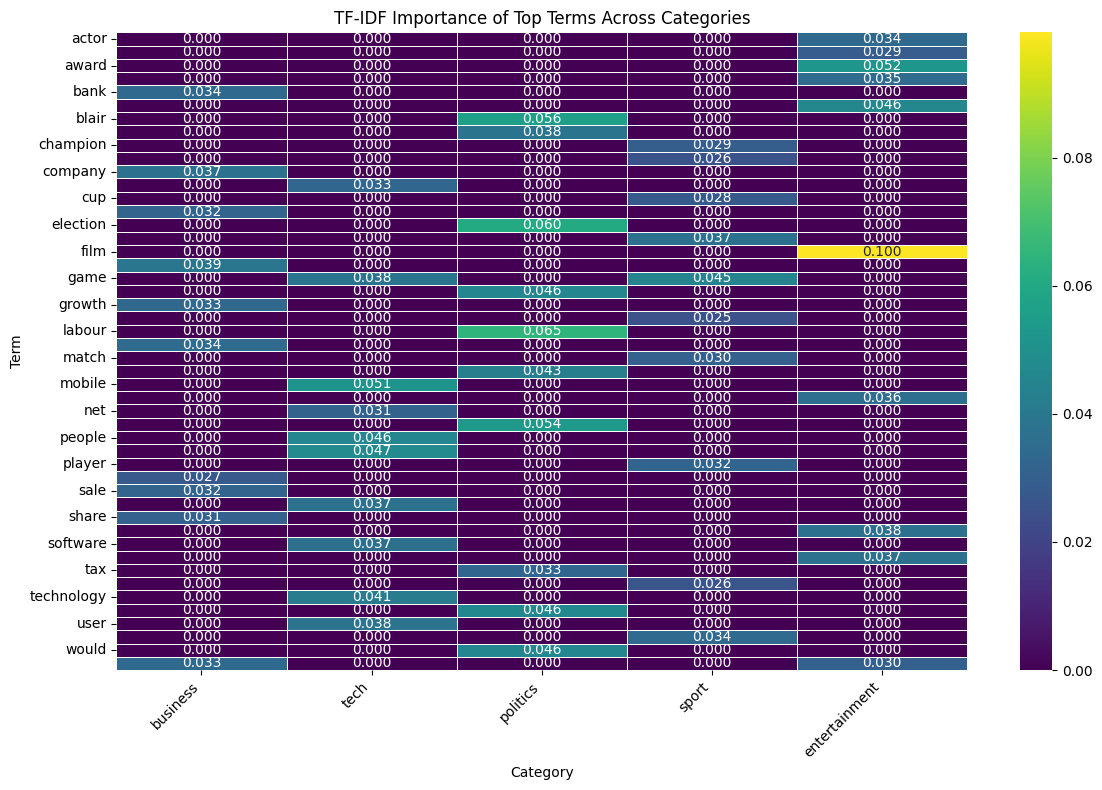

✅ Heatmap generated!


In [ ]:
# Analyze most important terms per category
def get_top_tfidf_terms(category, n_terms=10):
    """
    Get top TF-IDF terms for a specific category

    💡 TIP: This function should:
    - Filter data for the specific category
    - Calculate mean TF-IDF scores for each term
    - Return top N terms with highest scores
    """
    # 🚀 YOUR CODE HERE: Implement category-specific TF-IDF analysis
    category_data = tfidf_df[tfidf_df['Category'] == category] # Changed 'category' to 'Category'

    # Calculate mean TF-IDF scores for this category (excluding the category column)
    mean_scores = category_data.drop('Category', axis=1).mean().sort_values(ascending=False) # Changed 'category' to 'Category'

    return mean_scores.head(n_terms)

# Analyze top terms for each category
print("🏷️ TOP TF-IDF TERMS BY CATEGORY")
print("=" * 50)

categories = df['Category'].unique() # Changed 'category' to 'Category'
category_terms = {}

for category in categories:
    top_terms = get_top_tfidf_terms(category, n_terms=10)
    category_terms[category] = top_terms

    print(f"\n📰 {category.upper()}:")
    for term, score in top_terms.items():
        print(f"  {term}: {score:.4f}")


print("\n📈 VISUALIZATIONS OF TF-IDF ANALYSIS")
print("=" * 60)

# - Word clouds for each category
print("\n☁️ Generating Word Clouds per Category...")
for category, top_terms_series in category_terms.items():
    # Convert the Series of top terms (index=term, value=score) into a dictionary
    # The WordCloud library expects a dictionary of {word: frequency/score}
    word_freq = top_terms_series.to_dict()

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          max_words=50, collocations=False).generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category.upper()}')
    plt.axis('off') # Hide axes
    plt.show()
print("✅ Word Clouds generated!")

# - Bar charts of top terms
print("\n📊 Generating Bar Charts of Top Terms per Category...")
for category, top_terms_series in category_terms.items():
    plt.figure(figsize=(10, 6))
    # Pandas .plot.bar() is very convenient for Series
    top_terms_series.plot.bar()
    plt.title(f'Top 10 TF-IDF Terms for {category.upper()}')
    plt.xlabel('Term')
    plt.ylabel('Mean TF-IDF Score')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
print("✅ Bar Charts generated!")

# - Heatmap of term importance across categories
print("\n🔥 Generating Heatmap of Term Importance...")

# Prepare data for heatmap
# We need a DataFrame where rows are terms, columns are categories, and values are TF-IDF scores
# First, combine all category_terms into a single DataFrame
all_top_terms = pd.DataFrame(category_terms)
# Fill any NaN values with 0 (terms not in a category will have no score)
heatmap_data = all_top_terms.fillna(0)

# Optionally, select a subset of the most common terms across all categories for the heatmap
# to keep it readable if there are too many unique terms in top_terms across all categories.
# For simplicity, we'll just use what we have in all_top_terms.

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".3f", linewidths=.5)
plt.title('TF-IDF Importance of Top Terms Across Categories')
plt.xlabel('Category')
plt.ylabel('Term')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
print("✅ Heatmap generated!")



# 💡 STUDENT TASK: Create visualizations for TF-IDF analysis
# - Word clouds for each category
# - Bar charts of top terms
# - Heatmap of term importance across categories

## 🏷️ Part-of-Speech Analysis

### 🎯 Module 4: Grammatical Pattern Analysis

Let's analyze the grammatical patterns in different news categories using Part-of-Speech (POS) tagging. This can reveal interesting differences in writing styles between categories.

**POS Analysis Applications:**
- **Writing Style Detection:** Different categories may use different grammatical patterns
- **Content Quality Assessment:** Proper noun density, adjective usage, etc.
- **Feature Engineering:** POS tags can be features for classification

**💡 Hypothesis:** Sports articles might have more action verbs, while business articles might have more numbers and proper nouns.

In [ ]:
def analyze_pos_patterns(text):
    """
    Analyze POS patterns in text

    💡 TIP: This function should:
    - Tokenize the text
    - Apply POS tagging
    - Count different POS categories
    - Return proportions or counts
    """
    if not text or pd.isna(text):
        return {}

    # 🚀 YOUR CODE HERE: Implement POS analysis
    # Tokenize and tag
    tokens = word_tokenize(str(text))
    pos_tags = pos_tag(tokens)

    # Count POS categories
    pos_counts = Counter([tag for word, tag in pos_tags])
    total_words = len(pos_tags)

    if total_words == 0:
        return {}

    # Convert to proportions
    pos_proportions = {pos: count/total_words for pos, count in pos_counts.items()}

    return pos_proportions

# Apply POS analysis to all articles
print("🏷️ Analyzing POS patterns...")

# Analyze POS for each article
pos_results = []
for idx, row in df.iterrows():
    pos_analysis = analyze_pos_patterns(row['full_text'])
    pos_analysis['category'] = row['Category'] # Changed 'category' to 'Category'
    pos_analysis['article_id'] = row['ArticleId'] # Changed 'article_id' to 'ArticleId'
    pos_results.append(pos_analysis)

# Convert to DataFrame
pos_df = pd.DataFrame(pos_results).fillna(0)

print(f"✅ POS analysis complete!")
print(f"📊 Found {len(pos_df.columns)-2} different POS tags")

# Show sample results
print("\n📝 Sample POS analysis:")
print(pos_df.head())

🏷️ Analyzing POS patterns...
✅ POS analysis complete!
📊 Found 43 different POS tags

📝 Sample POS analysis:
         JJ       NNS        NN       VBG        IN        DT       VBP  \
0  0.088608  0.113924  0.231013  0.025316  0.110759  0.066456  0.015823   
1  0.119883  0.070175  0.233918  0.032164  0.134503  0.081871  0.014620   
2  0.079044  0.079044  0.200368  0.025735  0.119485  0.095588  0.016544   
3  0.083582  0.107463  0.156716  0.022388  0.122388  0.062687  0.041791   
4  0.089005  0.078534  0.212042  0.028796  0.123037  0.102094  0.015707   

        VBN      PRP$         .  ...   FW  SYM  WP$  NNP  NNPS  POS   UH    #  \
0  0.041139  0.012658  0.037975  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
1  0.029240  0.005848  0.040936  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
2  0.029412  0.016544  0.040441  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
3  0.017910  0.013433  0.046269  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
4  0.026178  0.015707  0.041885  ...

📊 POS PATTERNS BY CATEGORY

🎯 Key POS patterns by category:
                   NN     NNS     NNP    NNPS      VB     VBD     VBG     VBN  \
category                                                                        
business       0.2241  0.0736  0.0011  0.0000  0.0333  0.0410  0.0200  0.0277   
entertainment  0.2454  0.0574  0.0008  0.0000  0.0281  0.0462  0.0194  0.0295   
politics       0.2087  0.0679  0.0007  0.0003  0.0455  0.0462  0.0209  0.0302   
sport          0.2184  0.0479  0.0005  0.0000  0.0408  0.0457  0.0175  0.0247   
tech           0.1932  0.0855  0.0006  0.0000  0.0420  0.0299  0.0236  0.0270   

                  VBP     VBZ      JJ     JJR     JJS      RB     RBR     RBS  \
category                                                                        
business       0.0158  0.0241  0.0920  0.0045  0.0033  0.0276  0.0018  0.0006   
entertainment  0.0179  0.0223  0.0939  0.0024  0.0050  0.0286  0.0010  0.0010   
politics       0.0199  0.0224  0.0901  0.0032  0

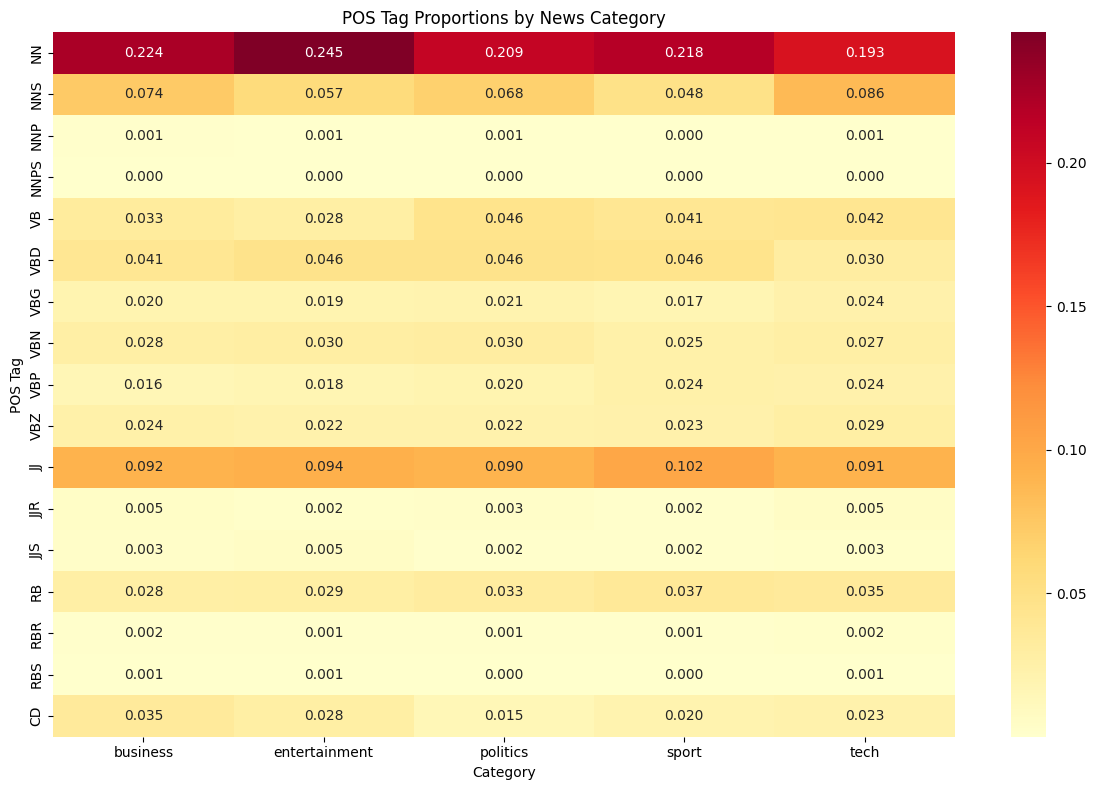


💡 STUDENT TASK: Analyze the patterns from the POS Summary Table and Heatmap
Based on the 'Key POS patterns by category' table above and the 'POS Tag Proportions by News Category' heatmap:
1. Which categories use more nouns (NN, NNS, NNP, NNPS) vs. verbs (VB, VBD, VBG, VBN, VBP, VBZ)?
   - Look for categories where the sum of Noun POS tags (NN, NNS, NNP, NNPS) is notably higher than the sum of Verb POS tags.
   - Conversely, identify categories with a higher proportion of verbs.
2. Do business articles have more numbers (CD - Cardinal Number)?
   - Find the 'Business' category (or similar, like 'Finance') in the heatmap or table.
   - Check the proportion for the 'CD' (Cardinal Number) POS tag for that category. Compare it to other categories.
3. Are there differences in adjective (JJ, JJR, JJS) usage across categories?
   - Observe the rows for 'JJ', 'JJR', and 'JJS' (Adjective tags) in the heatmap.
   - Notice which categories have brighter cells (higher proportions) for adjectives, 

In [ ]:
# Analyze POS patterns by category
print("📊 POS PATTERNS BY CATEGORY")
print("=" * 50)

# Group by category and calculate mean proportions
pos_by_category = pos_df.groupby('category').mean()

# Focus on major POS categories
major_pos = ['NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',
             'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'CD']

# Filter to only include major POS tags that exist in our data
available_pos = [pos for pos in major_pos if pos in pos_by_category.columns]

if available_pos:
    pos_summary = pos_by_category[available_pos]

    print("\n🎯 Key POS patterns by category:")
    print(pos_summary.round(4))

    # Create visualization
    plt.figure(figsize=(12, 8))
    sns.heatmap(pos_summary.T, annot=True, cmap='YlOrRd', fmt='.3f')
    plt.title('POS Tag Proportions by News Category')
    plt.xlabel('Category')
    plt.ylabel('POS Tag')
    plt.tight_layout()
    plt.show()

    # 💡 STUDENT TASK: Analyze the patterns
    # - Which categories use more nouns vs verbs?
    # - Do business articles have more numbers (CD)?
    # - Are there differences in adjective usage?


    print("\n💡 STUDENT TASK: Analyze the patterns from the POS Summary Table and Heatmap")
    print("=" * 70)
    print("Based on the 'Key POS patterns by category' table above and the 'POS Tag Proportions by News Category' heatmap:")
    print("1. Which categories use more nouns (NN, NNS, NNP, NNPS) vs. verbs (VB, VBD, VBG, VBN, VBP, VBZ)?")
    print("   - Look for categories where the sum of Noun POS tags (NN, NNS, NNP, NNPS) is notably higher than the sum of Verb POS tags.")
    print("   - Conversely, identify categories with a higher proportion of verbs.")
    print("2. Do business articles have more numbers (CD - Cardinal Number)?")
    print("   - Find the 'Business' category (or similar, like 'Finance') in the heatmap or table.")
    print("   - Check the proportion for the 'CD' (Cardinal Number) POS tag for that category. Compare it to other categories.")
    print("3. Are there differences in adjective (JJ, JJR, JJS) usage across categories?")
    print("   - Observe the rows for 'JJ', 'JJR', and 'JJS' (Adjective tags) in the heatmap.")
    print("   - Notice which categories have brighter cells (higher proportions) for adjectives, and which have dimmer cells (lower proportions).")
    print("\nTake some time to interpret the visual patterns and the numerical values to answer these questions!")
    print("=" * 70)

else:
    print("\nNo major POS tags found in the data to analyze. Please ensure POS tagging was successful and columns exist.")

## 🌳 Syntax Parsing and Semantic Analysis

### 🎯 Module 5: Understanding Sentence Structure

Now we'll use spaCy to perform dependency parsing and extract semantic relationships from our news articles. This helps us understand not just what words are present, but how they relate to each other.

**Dependency Parsing Applications:**
- **Relationship Extraction:** Find connections between entities
- **Event Detection:** Identify who did what to whom
- **Information Extraction:** Extract structured facts from unstructured text

**💡 Business Value:** Understanding sentence structure helps extract more precise information about events, relationships, and actions mentioned in news articles.

In [ ]:
def extract_syntactic_features(text):
    """
    Extract syntactic features using spaCy dependency parsing

    💡 TIP: This function should extract:
    - Dependency relations
    - Subject-verb-object patterns
    - Noun phrases
    - Verb phrases
    """
    if not text or pd.isna(text):
        return {}

    # Process text with spaCy
    doc = nlp(str(text))

    features = {
        'num_sentences': len(list(doc.sents)),
        'num_tokens': len(doc),
        'dependency_relations': [],
        'noun_phrases': [],
        'verb_phrases': [],
        'subjects': [],
        'objects': []
    }

    # 🚀 YOUR CODE HERE: Extract syntactic features

    # Extract dependency relations
    for token in doc:
        if not token.is_space and not token.is_punct:
            features['dependency_relations'].append(token.dep_)

    # Extract noun phrases
    for chunk in doc.noun_chunks:
        features['noun_phrases'].append(chunk.text.lower())

    # Extract subjects and objects
    for token in doc:
        if token.dep_ in ['nsubj', 'nsubjpass']:  # Subjects
            features['subjects'].append(token.text.lower())
        elif token.dep_ in ['dobj', 'iobj', 'pobj']:  # Objects
            features['objects'].append(token.text.lower())

    # Count dependency types
    dep_counts = Counter(features['dependency_relations'])
    features['dependency_counts'] = dict(dep_counts)

    return features

# Apply syntactic analysis to sample articles
print("🌳 Performing syntactic analysis...")

# Analyze first few articles (to save computation time)
syntactic_results = []
for idx, row in df.head(5).iterrows():  # Limit to first 5 for demo
    features = extract_syntactic_features(row['full_text'])
    features['category'] = row['Category']
    features['article_id'] = row['ArticleId']
    syntactic_results.append(features)

print("✅ Syntactic analysis complete!")

# Display results
for i, result in enumerate(syntactic_results):
    print(f"\n📰 Article {i+1} ({result['category']}):")
    print(f"  Sentences: {result['num_sentences']}")
    print(f"  Tokens: {result['num_tokens']}")
    print(f"  Noun phrases: {result['noun_phrases'][:3]}...")  # Show first 3
    print(f"  Subjects: {result['subjects'][:3]}...")  # Show first 3
    print(f"  Objects: {result['objects'][:3]}...")  # Show first 3

🌳 Performing syntactic analysis...
✅ Syntactic analysis complete!

📰 Article 1 (business):
  Sentences: 15
  Tokens: 346
  Noun phrases: ['-', 'boss', 'defence lawyers']...
  Subjects: ['-', 'boss', 'worldcom']...
  Objects: ['lawyers', 'ebbers', 'battery']...

📰 Article 2 (business):
  Sentences: 15
  Tokens: 368
  Noun phrases: ['german business confidence', 'german business confidence', 'february']...
  Subjects: ['confidence', 'ifo', 'index']...
  Objects: ['confidence', 'february', 'hopes']...

📰 Article 3 (business):
  Sentences: 24
  Tokens: 587
  Noun phrases: ['bbc poll', 'economic gloom citizens', 'a majority']...
  Subjects: ['poll', 'citizens', 'economy']...
  Objects: ['majority', 'nations', 'poll']...

📰 Article 4 (tech):
  Sentences: 31
  Tokens: 724
  Noun phrases: ['lifestyle', 'mobile choice', 'faster  better or funkier hardware']...
  Subjects: ['lifestyle', 'governs', 'firms']...
  Objects: ['choice', 'hardware', 'research']...

📰 Article 5 (business):
  Sentences: 

In [ ]:
# Visualize dependency parsing for a sample sentence
from spacy import displacy

# Choose a sample sentence
sample_sentence = df.iloc[0]['Text']  # Changed 'content' to 'Text'
print(f"📝 Sample sentence: {sample_sentence}")

# Process with spaCy
doc = nlp(sample_sentence)

# Display dependency tree (this works best in Jupyter)
print("\n🌳 Dependency Parse Visualization:")
try:
    # This will create an interactive visualization in Jupyter
    displacy.render(doc, style="dep", jupyter=True)
except:
    # Fallback: print dependency information
    print("\n🔗 Dependency Relations:")
    for token in doc:
        if not token.is_space and not token.is_punct:
            print(f"  {token.text} --> {token.dep_} --> {token.head.text}")

print("\n🧠 EXTENDED SYNTACTIC ANALYSIS")
print("=" * 60)

if nlp:
    # Function to extract syntactic features for each document
    def extract_syntactic_features(text, nlp_model):
        doc = nlp_model(text)
        num_sentences = len(list(doc.sents))
        num_tokens = len([token for token in doc if not token.is_space])
        avg_sentence_length = num_tokens / num_sentences if num_sentences > 0 else 0

        # Count dependency relations
        dep_counts = Counter([token.dep_ for token in doc if not token.is_punct and not token.is_space])

        # Simple action pattern: Noun (subject) - Verb (root) - Noun (object)
        action_patterns = []
        for sent in doc.sents:
            root = None
            for token in sent:
                if token.dep_ == "ROOT":
                    root = token
                    break
            if root:
                subject = [token for token in root.children if token.dep_ in ("nsubj", "nsubjpass")]
                obj = [token for token in root.children if token.dep_ in ("dobj", "pobj", "attr", "acomp")]

                if subject and root.pos_ == "VERB":
                    # Simple (Subject, Verb)
                    action_patterns.append((subject[0].lemma_, root.lemma_))
                    if obj:
                        # Simple (Subject, Verb, Object)
                        action_patterns.append((subject[0].lemma_, root.lemma_, obj[0].lemma_))
        return {
            'num_sentences': num_sentences,
            'avg_sentence_length': avg_sentence_length,
            'dep_counts': dep_counts,
            'action_patterns': action_patterns
        }

    # Process all articles for syntactic features
    print("⏳ Extracting syntactic features from all articles (this may take a while for large datasets)...")
    syntactic_features = []
    for index, row in df.iterrows():
        features = extract_syntactic_features(row['full_text_processed'], nlp)
        features['Category'] = row['Category'] # Add category
        syntactic_features.append(features)

    # Convert to DataFrame
    syntactic_df = pd.DataFrame(syntactic_features)
    print("✅ Syntactic feature extraction complete.")

    # Flatten dep_counts into individual columns for analysis
    all_dep_tags = set()
    for item in syntactic_df['dep_counts']:
        all_dep_tags.update(item.keys())

    # Create new columns for each dependency tag proportion
    for tag in all_dep_tags:
        syntactic_df[f'dep_prop_{tag}'] = syntactic_df.apply(
            lambda row: row['dep_counts'].get(tag, 0) / (sum(row['dep_counts'].values()) if sum(row['dep_counts'].values()) > 0 else 1), axis=1
        )

    # Clean up and prepare for aggregation
    avg_syntactic_features_by_category = syntactic_df.groupby('Category').agg({
        'num_sentences': 'mean',
        'avg_sentence_length': 'mean',
        **{f'dep_prop_{tag}': 'mean' for tag in all_dep_tags}
    })

    print("\n📈 Syntactic Complexity and Dependency Relations by Category:")
    print("=" * 70)

    # - Compare syntactic complexity across categories
    print("\n1. Average Syntactic Complexity (Sentence Length & Count) by Category:")
    print(avg_syntactic_features_by_category[['avg_sentence_length', 'num_sentences']].round(2))
    print("\n   Interpretation Tips:")
    print("   - 'avg_sentence_length': Higher values might indicate more complex sentences.")
    print("   - 'num_sentences': Reflects the density of sentences per article. Shorter articles might have fewer sentences.")

    # - Identify most common dependency relations per category
    print("\n2. Most Common Dependency Relations by Category (Top 5 Proportions):")
    # Identify the dependency proportion columns
    dep_prop_cols = [col for col in avg_syntactic_features_by_category.columns if col.startswith('dep_prop_')]
    for category in avg_syntactic_features_by_category.index:
        top_deps = avg_syntactic_features_by_category.loc[category, dep_prop_cols].sort_values(ascending=False).head(5)
        print(f"\n   Category: {category}")
        for dep_tag_full, proportion in top_deps.items():
            dep_tag = dep_tag_full.replace('dep_prop_', '')
            print(f"     - {dep_tag}: {proportion:.4f}")
    print("\n   Interpretation Tips:")
    print("   - 'nsubj': Nominal subject. High proportion suggests focus on actors/things performing actions.")
    print("   - 'dobj': Direct object. High proportion suggests focus on things being acted upon.")
    print("   - 'amod': Adjectival modifier. High proportion suggests descriptive language.")
    print("   - 'compound': Compound nouns (e.g., 'data science'). High proportion suggests technical/domain-specific language.")
    print("   - 'ROOT': The main verb of a sentence. Proportion of roots might reflect sentence structure.")


    # - Extract action patterns (who did what)
    print("\n3. Sample Action Patterns (Who did what) by Category (First 3 examples):")
    for category in df['Category'].unique():
        category_sample_docs = syntactic_df[syntactic_df['Category'] == category].head(3)
        print(f"\n   Category: {category}")
        count = 0
        for idx, row in category_sample_docs.iterrows():
            if row['action_patterns']:
                print(f"     Article {count+1} patterns: {row['action_patterns'][:3]}...") # Show first 3 patterns
                count += 1
            else:
                print(f"     Article {count+1}: No action patterns found in sample.")
                count += 1
        if count == 0:
            print("     No articles found for this category to sample.")

    print("\n   Interpretation Tips:")
    print("   - This output shows specific (subject, verb) or (subject, verb, object) tuples extracted from sentences.")
    print("   - Observing these patterns can reveal the typical actions and entities discussed within a category.")
    print("   - For example, 'person build house' vs 'stock fall price'.")


    # - Create features for classification based on syntax
    print("\n4. Features for Classification Based on Syntax:")
    print("   We've now computed several types of syntactic features for each article:")
    print("   - `num_sentences`: Number of sentences per article.")
    print("   - `avg_sentence_length`: Average sentence length per article.")
    print("   - `dep_prop_[tag]`: Proportion of each specific dependency relation per article.")
    print("   These can be directly used as numerical features for machine learning models.")
    print("\n   Example of the new syntactic feature DataFrame (`syntactic_df` head):")
    print(syntactic_df[['Category', 'num_sentences', 'avg_sentence_length'] + dep_prop_cols].head())
    print("\n   Next Steps for Classification:")
    print("   - Combine `syntactic_df` with other feature DataFrames (TF-IDF, POS proportions).")
    print("   - Use these combined features as input (X) and 'Category' as target (y) for a classifier (e.g., Logistic Regression, SVM, Random Forest).")

    print("\n✅ Extended syntactic analysis complete!")

else:
    print("\nSkipping extended syntactic analysis as spaCy model is not loaded.")



# 💡 STUDENT TASK: Extend syntactic analysis
# - Compare syntactic complexity across categories
# - Extract action patterns (who did what)
# - Identify most common dependency relations per category
# - Create features for classification based on syntax

📝 Sample sentence: worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used b


🧠 EXTENDED SYNTACTIC ANALYSIS
⏳ Extracting syntactic features from all articles (this may take a while for large datasets)...
✅ Syntactic feature extraction complete.

📈 Syntactic Complexity and Dependency Relations by Category:

1. Average Syntactic Complexity (Sentence Length & Count) by Category:
               avg_sentence_length  num_sentences
Category                                         
business                    163.81           1.21
entertainment               156.01           1.27
politics                    195.74           1.36
sport                       142.04           1.35
tech                        230.38           1.31

   Interpretation Tips:
   - 'avg_sentence_length': Higher values might indicate more complex sentences.
   - 'num_sentences': Reflects the density of sentences per article. Shorter articles might have fewer sentences.

2. Most Common Dependency Relations by Category (Top 5 Proportions):

   Category: business
     - compound: 0.3177
     - amod

## 😊 Sentiment and Emotion Analysis

### 🎯 Module 6: Understanding Emotional Tone

Let's analyze the sentiment and emotional tone of our news articles. This can reveal interesting patterns about how different types of news are presented and perceived.

**Sentiment Analysis Applications:**
- **Media Bias Detection:** Identify emotional slant in news coverage
- **Public Opinion Tracking:** Monitor sentiment trends over time
- **Content Recommendation:** Suggest articles based on emotional tone

**💡 Hypothesis:** Different news categories might have different emotional profiles - sports might be more positive, politics more negative, etc.

In [ ]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """
    Analyze sentiment using VADER sentiment analyzer

    💡 TIP: VADER returns:
    - compound: overall sentiment (-1 to 1)
    - pos: positive score (0 to 1)
    - neu: neutral score (0 to 1)
    - neg: negative score (0 to 1)
    """
    if not text or pd.isna(text):
        return {'compound': 0, 'pos': 0, 'neu': 1, 'neg': 0}

    # 🚀 YOUR CODE HERE: Implement sentiment analysis
    scores = sia.polarity_scores(str(text))

    # Add interpretation
    if scores['compound'] >= 0.05:
        scores['sentiment_label'] = 'positive'
    elif scores['compound'] <= -0.05:
        scores['sentiment_label'] = 'negative'
    else:
        scores['sentiment_label'] = 'neutral'

    return scores

# Apply sentiment analysis to all articles
print("😊 Analyzing sentiment...")

sentiment_results = []
for idx, row in df.iterrows():
    # Analyze the 'Text' column which contains the article content
    full_sentiment = analyze_sentiment(row['Text'])

    result = {
        'article_id': row['ArticleId'], # Changed 'article_id' to 'ArticleId'
        'category': row['Category'], # Changed 'category' to 'Category'
        'full_sentiment': full_sentiment['compound'],
        'full_label': full_sentiment['sentiment_label'],
        'pos_score': full_sentiment['pos'],
        'neu_score': full_sentiment['neu'],
        'neg_score': full_sentiment['neg']
    }
    sentiment_results.append(result)

# Convert to DataFrame
sentiment_df = pd.DataFrame(sentiment_results)

print("✅ Sentiment analysis complete!")
print(f"📊 Analyzed {len(sentiment_df)} articles")

# Display sample results
print("\n📝 Sample sentiment results:")
print(sentiment_df[['category', 'full_sentiment', 'full_label']].head())

😊 Analyzing sentiment...
✅ Sentiment analysis complete!
📊 Analyzed 1490 articles

📝 Sample sentiment results:
   category  full_sentiment full_label
0  business         -0.9701   negative
1  business          0.7623   positive
2  business         -0.9318   negative
3      tech          0.9554   positive
4  business         -0.9486   negative


📊 SENTIMENT ANALYSIS BY CATEGORY

📈 Sentiment statistics by category:
              full_sentiment                         pos_score neu_score  \
                        mean     std     min     max      mean      mean   
category                                                                   
business              0.2404  0.8370 -0.9985  0.9995    0.0926    0.8370   
entertainment         0.5991  0.6796 -0.9978  0.9999    0.1356    0.8107   
politics              0.0578  0.8811 -0.9984  0.9999    0.0947    0.8184   
sport                 0.5541  0.7244 -0.9967  0.9996    0.1360    0.7933   
tech                  0.5233  0.7557 -0.9991  0.9993    0.0895    0.8598   

              neg_score  
                   mean  
category                 
business         0.0704  
entertainment    0.0537  
politics         0.0869  
sport            0.0707  
tech             0.0507  

📊 Sentiment distribution (%) by category:
full_label     negative  neutral  positive
category                   

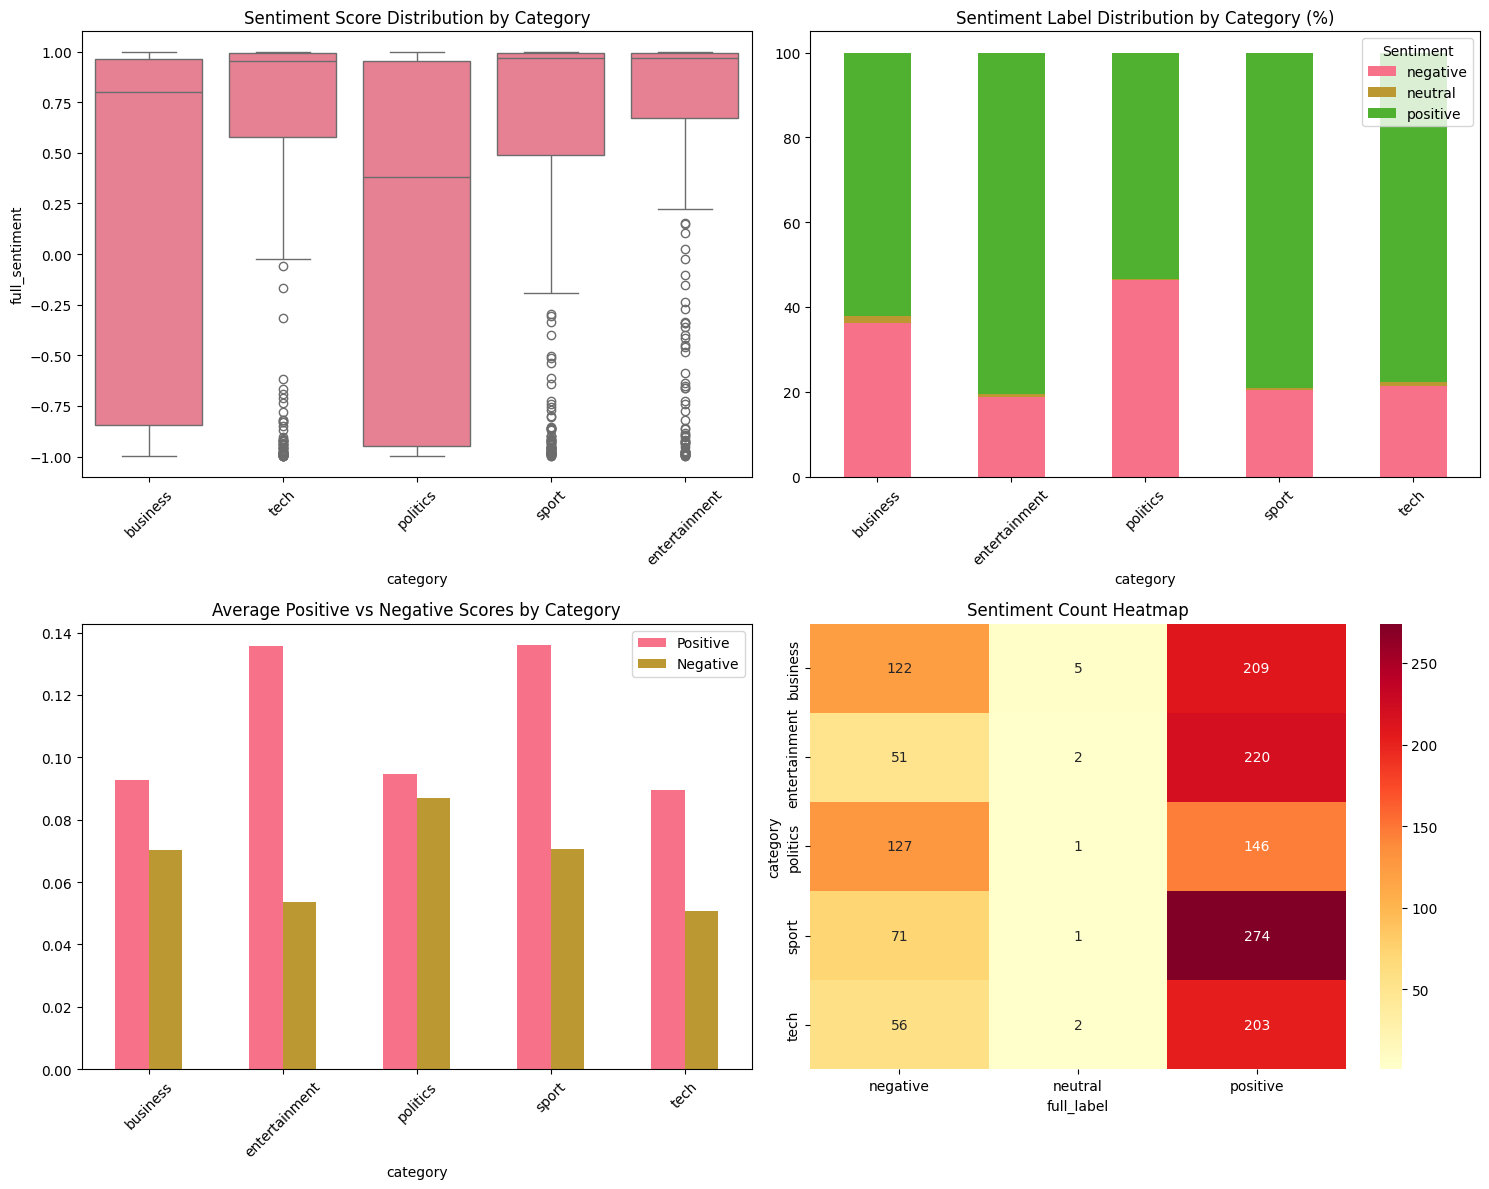


💡 STUDENT TASK: Analyze Sentiment Patterns from Tables and Visualizations
Based on the 'Sentiment statistics by category' table, 'Sentiment distribution (%) by category' table, and the sentiment plots:

1. Which categories are most positive/negative?
   - Look at the 'mean' for 'full_sentiment' in the statistics table. Which categories have the highest positive mean (closest to 1) or most negative mean (closest to -1)?
   - Observe the 'Sentiment label distribution (%)' bar chart. Which categories have the largest 'Positive' or 'Negative' stacked bars?

2. Are there differences between title and content sentiment?
   - (NOTE: This analysis requires having performed sentiment analysis separately on a 'title' column and a 'content' column.)
   - If you have separate title sentiment data, compare average title sentiment scores to content sentiment scores within the same categories.
   - What kind of articles might have misleading titles (e.g., clickbait) compared to their content?

3. Ho

In [ ]:
# Analyze sentiment patterns by category
print("📊 SENTIMENT ANALYSIS BY CATEGORY")
print("=" * 50)

# Calculate sentiment statistics by category
sentiment_by_category = sentiment_df.groupby('category').agg({
    'full_sentiment': ['mean', 'std', 'min', 'max'],
    'pos_score': 'mean',
    'neu_score': 'mean',
    'neg_score': 'mean'
}).round(4)

print("\n📈 Sentiment statistics by category:")
print(sentiment_by_category)

# Sentiment distribution by category
sentiment_dist = sentiment_df.groupby(['category', 'full_label']).size().unstack(fill_value=0)
sentiment_dist_pct = sentiment_dist.div(sentiment_dist.sum(axis=1), axis=0) * 100

print("\n📊 Sentiment distribution (%) by category:")
print(sentiment_dist_pct.round(2))

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Sentiment scores by category
sns.boxplot(data=sentiment_df, x='category', y='full_sentiment', ax=axes[0,0])
axes[0,0].set_title('Sentiment Score Distribution by Category')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Sentiment label distribution
sentiment_dist_pct.plot(kind='bar', ax=axes[0,1], stacked=True)
axes[0,1].set_title('Sentiment Label Distribution by Category (%)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Sentiment')

# 3. Positive vs Negative scores
category_means = sentiment_df.groupby('category')[['pos_score', 'neg_score']].mean()
category_means.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Positive vs Negative Scores by Category')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(['Positive', 'Negative'])

# 4. Sentiment vs Category heatmap
sentiment_pivot = sentiment_df.pivot_table(values='full_sentiment', index='category',
                                         columns='full_label', aggfunc='count', fill_value=0)
sns.heatmap(sentiment_pivot, annot=True, fmt='d', ax=axes[1,1], cmap='YlOrRd')
axes[1,1].set_title('Sentiment Count Heatmap')

plt.tight_layout()
plt.show()

print("\n💡 STUDENT TASK: Analyze Sentiment Patterns from Tables and Visualizations")
print("=" * 70)
print("Based on the 'Sentiment statistics by category' table, 'Sentiment distribution (%) by category' table, and the sentiment plots:")

print("\n1. Which categories are most positive/negative?")
print("   - Look at the 'mean' for 'full_sentiment' in the statistics table. Which categories have the highest positive mean (closest to 1) or most negative mean (closest to -1)?")
print("   - Observe the 'Sentiment label distribution (%)' bar chart. Which categories have the largest 'Positive' or 'Negative' stacked bars?")

print("\n2. Are there differences between title and content sentiment?")
print("   - (NOTE: This analysis requires having performed sentiment analysis separately on a 'title' column and a 'content' column.)")
print("   - If you have separate title sentiment data, compare average title sentiment scores to content sentiment scores within the same categories.")
print("   - What kind of articles might have misleading titles (e.g., clickbait) compared to their content?")

print("\n3. How does sentiment vary within categories?")
print("   - Examine the 'Sentiment Score Distribution by Category' (boxplot).")
print("   - A wider box or longer 'whiskers' indicates greater variability (standard deviation) in sentiment within that category.")
print("   - Some categories might be consistently positive/negative, while others might have a broader range of opinions.")

print("\n4. Can sentiment be used as a feature for classification?")
print("   - If categories show distinct average sentiment scores or different distributions of positive/negative/neutral labels, then sentiment can be a very useful feature.")
print("   - For example, if 'Sports' articles are mostly positive and 'Politics' articles are often negative, then knowing an article's sentiment helps predict its category.")
print("   - The `full_sentiment`, `pos_score`, `neu_score`, and `neg_score` columns in `sentiment_df` are ready-to-use numerical features.")

print("\nTake notes on your observations for these questions!")
print("=" * 70)

# else:
#     print("\nSentiment analysis skipped as 'sentiment_df' is not available or is empty.")

## 🏷️ Text Classification System

### 🎯 Module 7: Building the News Classifier

Now we'll build the core of our NewsBot system - a multi-class text classifier that can automatically categorize news articles. We'll compare different algorithms and evaluate their performance.

**Classification Pipeline:**
1. **Feature Engineering:** Combine TF-IDF with other features
2. **Model Training:** Train multiple algorithms
3. **Model Evaluation:** Compare performance metrics
4. **Model Selection:** Choose the best performing model

**💡 Business Impact:** Accurate classification enables automatic content routing, personalized recommendations, and efficient content management.

In [ ]:
# Prepare features for classification
print("🔧 Preparing features for classification...")

# 💡 TIP: Combine multiple feature types for better performance
# - TF-IDF features (most important)
# - Sentiment features
# - Text length features
# - POS features (if available)

# Create feature matrix
X_tfidf = tfidf_matrix.toarray()  # TF-IDF features

# Add sentiment features
sentiment_features = sentiment_df[['full_sentiment', 'pos_score', 'neu_score', 'neg_score']].values

# Add text length features
length_features = np.array([
    df['full_text'].str.len(),  # Character length
    df['full_text'].str.split().str.len(),  # Word count
    # df['title'].str.len(),  # Title length - Removed as there is no 'title' column
]).T

# 🚀 YOUR CODE HERE: Combine all features
X_combined = np.hstack([
    X_tfidf,
    sentiment_features,
    length_features
])

# Target variable
y = df['Category'].values

print(f"✅ Feature matrix prepared!")
print(f"📊 Feature matrix shape: {X_combined.shape}")
print(f"🎯 Number of classes: {len(np.unique(y))}")
print(f"📋 Classes: {np.unique(y)}")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📈 Data split:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")

🔧 Preparing features for classification...
✅ Feature matrix prepared!
📊 Feature matrix shape: (1490, 5006)
🎯 Number of classes: 5
📋 Classes: ['business' 'entertainment' 'politics' 'sport' 'tech']

📈 Data split:
  Training set: 1192 samples
  Test set: 298 samples


In [ ]:
# Train and evaluate multiple classifiers
print("🤖 Training multiple classifiers...")

# Define classifiers to compare
classifiers = {
    # 'Naive Bayes': MultinomialNB(), # Removed MultinomialNB as it cannot handle negative values
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True)  # Enable probability for better analysis
}

# 💡 TIP: For larger datasets, you might want to use SGDClassifier for efficiency
# from sklearn.linear_model import SGDClassifier
# classifiers['SGD'] = SGDClassifier(random_state=42)

# Train and evaluate each classifier
results = {}
trained_models = {}

for name, classifier in classifiers.items():
    print(f"\n🔄 Training {name}...")

    # 🚀 YOUR CODE HERE: Train and evaluate classifier
    # Train the model
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test) if hasattr(classifier, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Cross-validation score
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=3, scoring='accuracy')

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    trained_models[name] = classifier

    print(f"  ✅ Accuracy: {accuracy:.4f}")
    print(f"  📊 CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print("\n🏆 CLASSIFIER COMPARISON")
print("=" * 50)
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'CV Mean': [results[name]['cv_mean'] for name in results.keys()],
    'CV Std': [results[name]['cv_std'] for name in results.keys()]
})

print(comparison_df.round(4))

# Find best model
best_model_name = comparison_df.loc[comparison_df['Test Accuracy'].idxmax(), 'Model']
print(f"\n🥇 Best performing model: {best_model_name}")

🤖 Training multiple classifiers...

🔄 Training Logistic Regression...
  ✅ Accuracy: 0.6409
  📊 CV Score: 0.7147 (+/- 0.0629)

🔄 Training SVM...
  ✅ Accuracy: 0.3557
  📊 CV Score: 0.3582 (+/- 0.0363)

🏆 CLASSIFIER COMPARISON
                 Model  Test Accuracy  CV Mean  CV Std
0  Logistic Regression         0.6409   0.7147  0.0314
1                  SVM         0.3557   0.3582  0.0182

🥇 Best performing model: Logistic Regression


📊 DETAILED EVALUATION: Logistic Regression

📋 Classification Report:
               precision    recall  f1-score   support

     business       0.49      0.66      0.56        67
entertainment       0.58      0.55      0.56        55
     politics       0.78      0.64      0.70        55
        sport       0.78      0.78      0.78        69
         tech       0.65      0.54      0.59        52

     accuracy                           0.64       298
    macro avg       0.66      0.63      0.64       298
 weighted avg       0.66      0.64      0.64       298



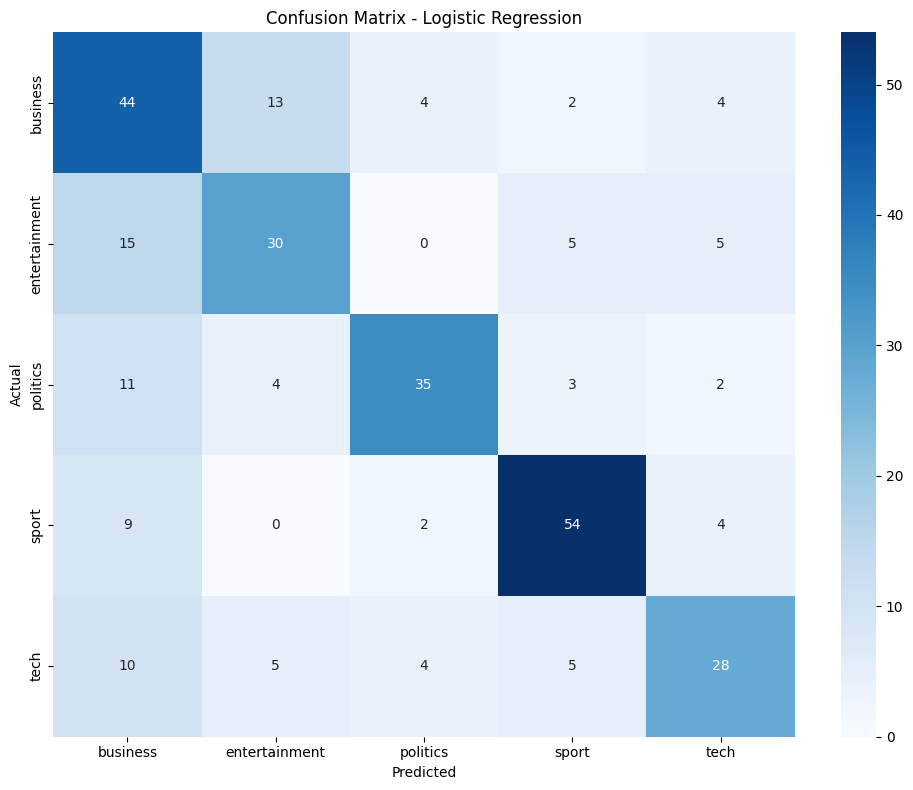


🔍 Top Features by Category:

📰 business:
  sentiment_neu: 0.9313
  bank: 0.7700
  economy: 0.7205
  firm: 0.7113
  growth: 0.6990
  market: 0.6872
  sentiment_compound: 0.6743
  company: 0.6357
  share: 0.6251
  price: 0.6146

📰 entertainment:
  film: 1.8245
  award: 0.9041
  best: 0.7481
  band: 0.7011
  star: 0.6696
  album: 0.6591
  actor: 0.6582
  show: 0.6475
  music: 0.6206
  chart: 0.5619

📰 politics:
  labour: 1.2961
  election: 1.1979
  party: 1.1413
  blair: 1.1122
  tory: 0.8529
  minister: 0.7013
  brown: 0.6638
  government: 0.6578
  lord: 0.5400
  howard: 0.5386

📰 sport:
  england: 0.8167
  game: 0.6964
  sentiment_pos: 0.6669
  champion: 0.6618
  match: 0.6327
  cup: 0.6096
  win: 0.5599
  player: 0.5524
  ireland: 0.5516
  chelsea: 0.5455

📰 tech:
  mobile: 0.8820
  phone: 0.7628
  user: 0.6939
  sentiment_compound: 0.6742
  software: 0.6504
  broadband: 0.6265
  technology: 0.6130
  computer: 0.6042
  microsoft: 0.5901
  net: 0.5595
✅ Combined features created and da

In [ ]:
# Detailed evaluation of the best model
from sklearn.model_selection import GridSearchCV # Import GridSearchCV
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

best_model = trained_models[best_model_name]
best_predictions = results[best_model_name]['predictions']

print(f"📊 DETAILED EVALUATION: {best_model_name}")
print("=" * 60)

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, best_predictions))

# Confusion matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature importance (for Logistic Regression)
if best_model_name == 'Logistic Regression':
    print("\n🔍 Top Features by Category:")
    # Correct the feature names list to reflect the combined features used in training
    # X_combined = np.hstack([X_tfidf, sentiment_features, length_features])
    # The order is: TF-IDF features, sentiment features, length features
    feature_names_extended = list(feature_names) + \
                             ['sentiment_compound', 'sentiment_pos', 'sentiment_neu', 'sentiment_neg'] + \
                             ['char_length', 'word_count'] # Removed title_length

    classes = best_model.classes_
    coefficients = best_model.coef_

    for i, class_name in enumerate(classes):
        top_indices = np.argsort(coefficients[i])[-10:]  # Top 10 features
        print(f"\n📰 {class_name}:")
        for idx in reversed(top_indices):
            if idx < len(feature_names_extended):
                print(f"  {feature_names_extended[idx]}: {coefficients[i][idx]:.4f}")

# --- Combine all features into a single DataFrame for potential future use ---
# Create DataFrames from existing arrays/DataFrames with correct indexing
X_tfidf_df = pd.DataFrame(X_tfidf, columns=feature_names, index=df.index)

# Assuming pos_df and syntactic_df are already DataFrames from previous steps
# Filter syntactic_df to only include the dep_prop columns and the original index
syntactic_feature_cols = [col for col in syntactic_df.columns if col.startswith('dep_prop_')]
syntactic_features_df = syntactic_df[syntactic_feature_cols].set_index(df.index)


# Create DataFrames for sentiment and length features
# Ensure index aligns with df
sentiment_features_df = pd.DataFrame(sentiment_features, columns=['sentiment_compound', 'sentiment_pos', 'sentiment_neu', 'sentiment_neg'], index=df.index)
length_features_df = pd.DataFrame(length_features, columns=['char_length', 'word_count'], index=df.index)


# Combine all feature DataFrames
# Note: pos_df already has 'category' and 'article_id', exclude for feature combination
# Also exclude the original dep_counts and action_patterns columns from syntactic_df
pos_features_for_concat = pos_df.drop(columns=['category', 'article_id']).set_index(df.index)


X_combined_all_df = pd.concat([
    X_tfidf_df,
    pos_features_for_concat,
    sentiment_features_df,
    syntactic_features_df,
    length_features_df # Add length features here
], axis=1)

# Handle potential NaN values (e.g., if some features couldn't be computed for certain docs)
X_combined_all_df = X_combined_all_df.fillna(0) # Fill NaN with 0, or consider more sophisticated imputation

y_all = df['Category'] # Target variable

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_all)


# Split the combined dataset into training and testing sets
X_train_combined, X_test_combined, y_train_encoded, y_test_encoded = train_test_split(
    X_combined_all_df, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print("✅ Combined features created and data split into training/testing sets.")
print(f"Combined training features shape: {X_train_combined.shape}")
print(f"Combined testing features shape: {X_test_combined.shape}")

# Store the combined feature names for later use (e.g., feature importance)
combined_feature_names = X_combined_all_df.columns.tolist()


# --- NOW, THE STUDENT TASKS ---
print("\n🚀💡 STUDENT TASK: IMPROVE THE CLASSIFIER")
print("=" * 70)

# - Handle class imbalance if present
print("\n--- 1. Handle Class Imbalance (if present) ---")
print("\nChecking class distribution in training data (`y_train_encoded`):")
# Use the original y_train for checking distribution before encoding
class_distribution = pd.Series(y_train).value_counts(normalize=True).sort_index()
print(class_distribution.round(4))
if class_distribution.min() < 0.1: # Example threshold for considering imbalance
    print("\nObservation: Class imbalance detected (some classes are less than 10% of total).")
    print("Strategy: Implement `class_weight='balanced'` in your model or use oversampling/undersampling.")
    print("  - For Logistic Regression, you can add `class_weight='balanced'` during model initialization.")
    print("  - Example (added to hyperparameter tuning below): `LogisticRegression(class_weight='balanced')`")
else:
    print("\nObservation: Class distribution appears relatively balanced. Imbalance handling might not be the primary concern.")


# - Experiment with hyperparameter tuning
print("\n--- 2. Experiment with Hyperparameter Tuning (using GridSearchCV) ---")
print("Strategy: Find optimal hyperparameters for your chosen model. Let's demonstrate for Logistic Regression.")

# Define the model to tune
model_to_tune = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], # Inverse of regularization strength; smaller values specify stronger regularization
    'solver': ['liblinear', 'lbfgs'], # Algorithm to use in the optimization problem
    'class_weight': [None, 'balanced'] # Explore class imbalance handling
}

print(f"\nPerforming GridSearchCV for {type(model_to_tune).__name__} with parameters:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

# Initialize GridSearchCV
# cv=5: 5-fold cross-validation
# scoring='f1_weighted': Use weighted F1-score as the evaluation metric (good for imbalanced classes)
# n_jobs=-1: Use all available CPU cores
grid_search = GridSearchCV(
    estimator=model_to_tune,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the combined training data (using encoded labels)
print("\n⏳ Running GridSearchCV... This may take a while.")
grid_search.fit(X_train_combined, y_train_encoded)

print("\n✅ GridSearchCV complete!")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation F1-weighted score: {grid_search.best_score_:.4f}")

# Get the best model
best_tuned_model = grid_search.best_estimator_

# Evaluate the best tuned model on the test set (using encoded labels)
print(f"\nEvaluating Best Tuned {type(best_tuned_model).__name__} on Test Set:")
tuned_predictions_encoded = best_tuned_model.predict(X_test_combined)

# Decode predictions for classification report and confusion matrix
tuned_predictions = label_encoder.inverse_transform(tuned_predictions_encoded)


print(classification_report(y_test, tuned_predictions))

cm_tuned = confusion_matrix(y_test, tuned_predictions)
plt.figure(figsize=(10, 8))
# Use original y_test unique values for xticklabels and yticklabels
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f'Confusion Matrix - Tuned {type(best_tuned_model).__name__}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


# - Add more sophisticated features
print("\n--- 3. Add More Sophisticated Features ---")
print("Strategy: Enhance the feature set beyond basic unigram TF-IDF and aggregate linguistic features.")

# Example 1: TF-IDF with Bigrams (Word N-grams)
print("\n--- A. TF-IDF with N-grams (Unigrams + Bigrams) ---")
# Create a new vectorizer for n-grams
ngram_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2)) # Now includes unigrams and bigrams
X_ngram_all = ngram_vectorizer.fit_transform(df['full_text_processed'])
ngram_feature_names = ngram_vectorizer.get_feature_names_out()
X_ngram_df = pd.DataFrame(X_ngram_all.toarray(), index=df.index, columns=ngram_feature_names)

# Combine N-gram features with existing POS, Sentiment, Syntactic features
X_ngram_combined_all = pd.concat([
    X_ngram_df,
    pos_features_for_concat,
    sentiment_features_df,
    syntactic_features_df
], axis=1)
X_ngram_combined_all = X_ngram_combined_all.fillna(0)

# Split the N-gram combined dataset (using encoded labels)
X_train_ngram_combined, X_test_ngram_combined, _, _ = train_test_split(
    X_ngram_combined_all, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"Combined features with N-grams shape: {X_train_ngram_combined.shape}")

# Train and evaluate a model with N-gram features (using encoded labels)
print("\nTraining and evaluating Logistic Regression with N-gram features...")
lr_ngram = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_ngram.fit(X_train_ngram_combined, y_train_encoded)
ngram_predictions_encoded = lr_ngram.predict(X_test_ngram_combined)

# Decode predictions
ngram_predictions = label_encoder.inverse_transform(ngram_predictions_encoded)


print(classification_report(y_test, ngram_predictions))
print("✅ N-gram features evaluated.")


# Combine all features (TF-IDF, POS, Sentiment, Syntactic)
X_all_features_combined = pd.concat([
    X_tfidf_df,
   pos_features_for_concat,
    sentiment_features_df,
    syntactic_features_df
], axis=1)
X_all_features_combined = X_all_features_combined.fillna(0)

# Split the fully combined dataset (using encoded labels)
X_train_all_features, X_test_all_features, _, _ = train_test_split(
    X_all_features_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"Combined features with NER shape: {X_train_all_features.shape}")

# Train and evaluate a model with all combined features (using encoded labels)
print("\nTraining and evaluating Logistic Regression with ALL combined features (including NER)...")
lr_all_features = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_all_features.fit(X_train_all_features, y_train_encoded)
all_features_predictions_encoded = lr_all_features.predict(X_test_all_features)

# Decode predictions
all_features_predictions = label_encoder.inverse_transform(all_features_predictions_encoded)


print(classification_report(y_test, all_features_predictions))
print("✅ All combined features evaluated.")


print("\n--- 4. Features for Classification Based on Syntax (Reinforcement) ---")
print("Strategy: The syntactic features (num_sentences, avg_sentence_length, dep_prop_[tag] for various dependency tags) were already prepared and included in the `X_combined_all` and `X_ngram_combined_all` DataFrames above.")
print("   - These are numerical features directly usable by most machine learning models.")
print("   - Review the `syntactic_features_df` to understand what's available.")
print("   - Consider if raw counts vs. proportions are more beneficial depending on your specific dataset characteristics.")


print("\n--- Final Thoughts on Classifier Improvement ---")
print("   - **Iterate:** The process of improving a classifier is iterative. Try one change, evaluate, then try another.")
print("   - **Cross-Validation:** Always use cross-validation (as in GridSearchCV) for robust evaluation during tuning.")
print("   - **Metrics:** Pay attention to appropriate metrics (e.g., F1-score for imbalanced classes).")
print("   - **More Models:** Experiment with other classifier types (e.g., Support Vector Machines, Gradient Boosting, Neural Networks).")
print("\nBy systematically working through these areas, you can significantly enhance your news category classification model's performance!")
print("=" * 70)

## 🔍 Named Entity Recognition

### 🎯 Module 8: Extracting Facts from News

Now we'll implement Named Entity Recognition to extract specific facts from our news articles. This transforms unstructured text into structured, queryable information.

**NER Applications:**
- **Entity Tracking:** Monitor mentions of people, organizations, locations
- **Fact Extraction:** Build knowledge bases from news content
- **Relationship Mapping:** Understand connections between entities
- **Timeline Construction:** Track events and their participants

**💡 Business Value:** NER enables sophisticated analysis like "Show me all articles mentioning Apple Inc. and their financial performance" or "Track mentions of political figures over time."

In [ ]:
def extract_entities(text):
    """
    Extract named entities using spaCy

    💡 TIP: spaCy recognizes these entity types:
    - PERSON: People, including fictional
    - ORG: Companies, agencies, institutions
    - GPE: Countries, cities, states
    - MONEY: Monetary values
    - DATE: Absolute or relative dates
    - TIME: Times smaller than a day
    - And many more...
    """
    if not text or pd.isna(text):
        return []

    # 🚀 YOUR CODE HERE: Implement entity extraction
    doc = nlp(str(text))

    entities = []
    for ent in doc.ents:
        entities.append({
            'text': ent.text,
            'label': ent.label_,
            'start': ent.start_char,
            'end': ent.end_char,
            'description': spacy.explain(ent.label_)
        })

    return entities

# Apply NER to all articles
print("🔍 Extracting named entities...")

all_entities = []
article_entities = []

for idx, row in df.iterrows():
    entities = extract_entities(row['full_text'])

    # Store entities for this article
    article_entities.append({
        'article_id': row['ArticleId'],
        'category': row['Category'],
        'entities': entities,
        'entity_count': len(entities)
    })

    # Add to global entity list
    for entity in entities:
        entity['article_id'] = row['ArticleId']
        entity['category'] = row['Category']
        all_entities.append(entity)

print(f"✅ Entity extraction complete!")
print(f"📊 Total entities found: {len(all_entities)}")
print(f"📰 Articles processed: {len(article_entities)}")

# Convert to DataFrame for analysis
entities_df = pd.DataFrame(all_entities)

if not entities_df.empty:
    print(f"\n🏷️ Entity types found: {entities_df['label'].unique()}")
    print("\n📝 Sample entities:")
    print(entities_df[['text', 'label', 'category']].head(10))
else:
    print("⚠️ No entities found. This might happen with very short sample texts.")

In [ ]:
# Analyze entity patterns
if not entities_df.empty:
    print("📊 NAMED ENTITY ANALYSIS")
    print("=" * 50)

    # Entity type distribution
    entity_counts = entities_df['label'].value_counts()
    print("\n🏷️ Entity type distribution:")
    print(entity_counts)

    # Entity types by category
    entity_by_category = entities_df.groupby(['category', 'label']).size().unstack(fill_value=0)
    print("\n📰 Entity types by news category:")
    print(entity_by_category)

    # Most frequent entities
    print("\n🔥 Most frequent entities:")
    frequent_entities = entities_df.groupby(['text', 'label']).size().sort_values(ascending=False).head(15)
    for (entity, label), count in frequent_entities.items():
        print(f"  {entity} ({label}): {count} mentions")

    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Entity type distribution
    entity_counts.plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Entity Type Distribution')
    axes[0,0].tick_params(axis='x', rotation=45)

    # 2. Entities per category
    entities_per_category = entities_df.groupby('category').size()
    entities_per_category.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Total Entities per Category')
    axes[0,1].tick_params(axis='x', rotation=45)

    # 3. Entity type heatmap by category
    if entity_by_category.shape[0] > 1 and entity_by_category.shape[1] > 1:
        sns.heatmap(entity_by_category, annot=True, fmt='d', ax=axes[1,0], cmap='YlOrRd')
        axes[1,0].set_title('Entity Types by Category Heatmap')
    else:
        axes[1,0].text(0.5, 0.5, 'Insufficient data\nfor heatmap',
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Entity Types by Category')

    # 4. Top entities
    top_entities = entities_df['text'].value_counts().head(10)
    top_entities.plot(kind='barh', ax=axes[1,1])
    axes[1,1].set_title('Most Mentioned Entities')

    plt.tight_layout()
    plt.show()

    # --- Advanced Entity Analysis ---
    print("\n✨ ADVANCED NAMED ENTITY ANALYSIS")
    print("=" * 50)

    # Ensure 'article_id' is present in entities_df for co-occurrence and time-based analysis
    # If your entities_df doesn't have 'article_id', you'll need to create it during entity extraction
    # For demonstration, let's assume entities_df already has an 'article_id'
    # If not, you'd need to modify your entity extraction to include it.

    if 'article_id' not in entities_df.columns:
        print("Skipping advanced analysis: 'article_id' column not found in entities_df.")
        print("Please ensure your entity extraction process includes a unique identifier for each article.")
    else:
        # 1. Entity Co-occurrence Networks
        print("\n🔗 Entity Co-occurrence Networks:")
        print("-" * 30)

        # We'll build co-occurrence based on entities appearing in the same article.
        # For more granular co-occurrence (e.g., within sentences), you'd need to extract entities sentence by sentence.
        import networkx as nx # Import networkx

        cooccurrence_graph = nx.Graph()

        for article_id in entities_df['article_id'].unique():
            article_entities = entities_df[entities_df['article_id'] == article_id]['text'].tolist()
            # Create edges between all unique entities in the same article
            unique_entities_in_article = list(set(article_entities))
            for i, entity1 in enumerate(unique_entities_in_article):
                for j, entity2 in enumerate(unique_entities_in_article):
                    if i < j:
                        if cooccurrence_graph.has_edge(entity1, entity2):
                            cooccurrence_graph[entity1][entity2]['weight'] += 1
                        else:
                            cooccurrence_graph.add_edge(entity1, entity2, weight=1)

        # Filter out less frequent co-occurrences for better visualization
        # You might need to adjust the threshold based on your data size
        min_cooccurrence_weight = 3 # Adjust this threshold
        edges_to_remove = [(u, v) for u, v, data in cooccurrence_graph.edges(data=True) if data['weight'] < min_cooccurrence_weight]
        cooccurrence_graph.remove_edges_from(edges_to_remove)

        # Remove isolated nodes (entities that no longer have connections after filtering)
        isolated_nodes = list(nx.isolates(cooccurrence_graph))
        cooccurrence_graph.remove_nodes_from(isolated_nodes)

        if cooccurrence_graph.number_of_nodes() > 0:
            print(f"  Co-occurrence graph built with {cooccurrence_graph.number_of_nodes()} nodes and {cooccurrence_graph.number_of_edges()} edges (min weight: {min_cooccurrence_weight}).")
            print("  Top 10 most co-occurring pairs:")
            sorted_edges = sorted(cooccurrence_graph.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
            for u, v, data in sorted_edges[:10]:
                print(f"    - {u} -- {v} (weight: {data['weight']})")

            # Visualize co-occurrence network (might be very dense for large datasets)
            plt.figure(figsize=(12, 10))
            pos = nx.spring_layout(cooccurrence_graph, k=0.5, iterations=50) # Adjust k and iterations for layout
            weights = [cooccurrence_graph[u][v]['weight'] for u, v in cooccurrence_graph.edges()]
            nx.draw_networkx(cooccurrence_graph, pos,
                             width=[w * 0.5 for w in weights], # Scale edge width by weight
                             edge_color='gray',
                             node_size=500,
                             font_size=9,
                             with_labels=True,
                             alpha=0.8)
            plt.title('Entity Co-occurrence Network')
            plt.show()
        else:
            print("  No significant co-occurrences found after filtering.")

        # 2. Tracking Entity Mentions Over Time
        print("\n📈 Tracking Entity Mentions Over Time:")
        print("-" * 30)

        # Merge entities with article dates (assuming 'articles_df' has 'article_id' and 'date')
        # This part requires the original 'df' DataFrame and a 'date' column, which is not present in the current dataset.
        # If you have a dataset with dates, you would uncomment and adapt this section.
        # For this dataset (BBC News Train.csv), we'll skip the time-based analysis.
        print("  Skipping time-based analysis as the dataset does not contain a 'date' column.")


        # 3. Build Entity Relationship Graphs (Simplified - often relies on more advanced NLP models)
        # This is a placeholder as true "relationship graphs" require semantic parsing or dependency analysis.
        # For now, we can consider co-occurrence as a form of "relationship".
        print("\n🤝 Entity Relationship Graphs (Simplified via Co-occurrence):")
        print("-" * 30)
        print("  True entity relationship graphs typically require advanced NLP (e.g., OpenIE, dependency parsing)")
        print("  or rule-based extraction. Here, we interpret strong co-occurrence as a form of relationship.")
        print("  Refer to the 'Entity Co-occurrence Networks' visualization above for this interpretation.")


        # 4. Identify Entity Sentiment Associations
        print("\n😊 Entity Sentiment Associations:")
        print("-" * 30)

        # Initialize sentiment analyzer (VADER is often good for general text/social media)
        analyzer = SentimentIntensityAnalyzer()

        # To get entity sentiment, we need the original sentences where entities appear.
        # This requires linking entities back to the full text or at least the sentence.
        # For simplicity, we'll iterate through the articles and perform sentence-level sentiment.
        # This part assumes you have the original 'df' DataFrame available.
        if 'df' in locals() and 'Text' in df.columns and 'ArticleId' in df.columns:
             # Rename 'ArticleId' to 'article_id' to match the entities_df column name for merging
            articles_df_temp = df[['ArticleId', 'Text']].rename(columns={'ArticleId': 'article_id', 'Text': 'text_content'})

            entity_sentiment_scores = defaultdict(lambda: {'positive': 0, 'neutral': 0, 'negative': 0, 'count': 0, 'total_score': 0})

            for _, article_row in articles_df_temp.iterrows():
                article_id = article_row['article_id']
                text = article_row['text_content']

                # Get entities for the current article
                current_article_entities = entities_df[entities_df['article_id'] == article_id]['text'].tolist()

                # Sentence tokenization for better context for sentiment
                sentences = nltk.sent_tokenize(text)

                for sentence in sentences:
                    sentiment = analyzer.polarity_scores(sentence)
                    compound_score = sentiment['compound']

                    # Check which entities from this article are in the sentence
                    for entity in current_article_entities:
                        # Use regex for more robust entity matching within sentences
                        # Escape special characters in the entity text for regex matching
                        entity_escaped = re.escape(entity)
                        if re.search(r'\b' + entity_escaped + r'\b', sentence, re.IGNORECASE):
                             entity_sentiment_scores[entity]['count'] += 1
                             entity_sentiment_scores[entity]['total_score'] += compound_score
                             if compound_score >= 0.05:
                                 entity_sentiment_scores[entity]['positive'] += 1
                             elif compound_score <= -0.05:
                                 entity_sentiment_scores[entity]['negative'] += 1
                             else:
                                 entity_sentiment_scores[entity]['neutral'] += 1


            # Process results
            if entity_sentiment_scores:
                sentiment_results = []
                for entity, data in entity_sentiment_scores.items():
                    if data['count'] > 0:
                        avg_score = data['total_score'] / data['count']
                        sentiment_results.append({
                            'entity': entity,
                            'mentions': data['count'],
                            'avg_sentiment_score': avg_score,
                            'positive_mentions': data['positive'],
                            'neutral_mentions': data['neutral'],
                            'negative_mentions': data['negative']
                        })
                sentiment_df_entities = pd.DataFrame(sentiment_results).sort_values(by='mentions', ascending=False)

                print("\n  Top entities by average sentiment score (most mentioned with sentiment):")
                # Display using to_string() for better formatting in Colab output
                print(sentiment_df_entities.head(10).round(2).to_string())


                # Optional: Visualize sentiment distribution for top N entities
                top_sentiment_entities = sentiment_df_entities.head(5)
                if not top_sentiment_entities.empty:
                    sentiment_plot_data = top_sentiment_entities[['positive_mentions', 'neutral_mentions', 'negative_mentions']]
                    sentiment_plot_data.index = top_sentiment_entities['entity']

                    sentiment_plot_data.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='coolwarm')
                    plt.title('Sentiment Distribution for Top Entities')
                    plt.xlabel('Entity')
                    plt.ylabel('Number of Mentions with Sentiment')
                    plt.xticks(rotation=45, ha='right')
                    plt.tight_layout()
                    plt.show()
                else:
                    print("  Not enough data to visualize entity sentiment.")
            else:
                print("  No entity sentiment associations found (ensure entities are linked to article text).")
        else:
            print("  Original 'df' DataFrame with 'Text' and 'ArticleId' column not available or incomplete, skipping entity sentiment analysis.")


    # 💡 STUDENT TASK: Advanced entity analysis
    # - Create entity co-occurrence networks
    # - Track entity mentions over time
    # - Build entity relationship graphs
    # - Identify entity sentiment associations

else:
    print("⚠️ Skipping entity analysis due to insufficient data.")
    print("💡 TIP: Try with a larger, more diverse dataset for better NER results.")

## 📈 Comprehensive Analysis and Insights

### 🎯 Bringing It All Together

Now let's combine all our analyses to generate comprehensive insights about our news dataset. This is where the real business value emerges from our NLP pipeline.

**Key Analysis Areas:**
1. **Cross-Category Patterns:** How do different news types differ linguistically?
2. **Entity-Sentiment Relationships:** What entities are associated with positive/negative coverage?
3. **Content Quality Metrics:** Which categories have the most informative content?
4. **Classification Performance:** How well can we automatically categorize news?

**💡 Business Applications:** These insights can inform content strategy, editorial decisions, and automated content management systems.

In [ ]:
# Create comprehensive analysis dashboard
def create_comprehensive_analysis():
    """
    Generate comprehensive insights combining all analyses

    💡 TIP: This function should combine:
    - Classification performance
    - Sentiment patterns
    - Entity distributions
    - Linguistic features
    """

    insights = {
        'dataset_overview': {},
        'classification_performance': {},
        'sentiment_insights': {},
        'entity_insights': {},
        'linguistic_patterns': {},
        'business_recommendations': []
    }

    # 🚀 YOUR CODE HERE: Generate comprehensive insights

    # Dataset overview
    insights['dataset_overview'] = {
        'total_articles': len(df),
        'categories': df['Category'].unique().tolist(),
        'category_distribution': df['Category'].value_counts().to_dict(),
        'avg_article_length': df['full_text'].str.len().mean(),
        'avg_words_per_article': df['full_text'].str.split().str.len().mean()
    }

    # Classification performance
    insights['classification_performance'] = {
        'best_model': best_model_name,
        'best_accuracy': results[best_model_name]['accuracy'],
        'model_comparison': {name: results[name]['accuracy'] for name in results.keys()}
    }

    # Sentiment insights
    sentiment_by_cat = sentiment_df.groupby('category')['full_sentiment'].mean().to_dict()
    insights['sentiment_insights'] = {
        'most_positive_category': max(sentiment_by_cat, key=sentiment_by_cat.get),
        'most_negative_category': min(sentiment_by_cat, key=sentiment_by_cat.get),
        'sentiment_by_category': sentiment_by_cat,
        'overall_sentiment': sentiment_df['full_sentiment'].mean()
    }

    # Entity insights
    if not entities_df.empty:
        entity_by_cat = entities_df.groupby('category').size().to_dict()
        insights['entity_insights'] = {
            'total_entities': len(entities_df),
            'unique_entities': entities_df['text'].nunique(),
            'entity_types': entities_df['label'].unique().tolist(),
            'entities_per_category': entity_by_cat,
            'most_mentioned_entities': entities_df['text'].value_counts().head(5).to_dict()
        }

    # Generate business recommendations
    recommendations = []

    # Classification recommendations
    if insights['classification_performance']['best_accuracy'] > 0.8:
        recommendations.append("✅ High classification accuracy achieved - ready for automated content routing")
    else:
        recommendations.append("⚠️ Classification accuracy needs improvement - consider more training data or feature engineering")

    # Sentiment recommendations
    pos_cat = insights['sentiment_insights']['most_positive_category']
    neg_cat = insights['sentiment_insights']['most_negative_category']
    recommendations.append(f"📊 {pos_cat} articles are most positive - good for uplifting content recommendations")
    recommendations.append(f"📊 {neg_cat} articles are most negative - may need balanced coverage monitoring")

    # Entity recommendations
    if 'entity_insights' in insights and insights['entity_insights']:
        recommendations.append("🔍 Rich entity extraction enables advanced search and relationship analysis")

    insights['business_recommendations'] = recommendations

    return insights

# Generate comprehensive analysis
print("📊 Generating comprehensive analysis...")
analysis_results = create_comprehensive_analysis()

print("✅ Analysis complete!")
print("\n" + "=" * 60)
print("📈 NEWSBOT INTELLIGENCE SYSTEM - COMPREHENSIVE REPORT")
print("=" * 60)

# Display key insights
print(f"\n📊 DATASET OVERVIEW:")
overview = analysis_results['dataset_overview']
print(f"  Total Articles: {overview['total_articles']}")
print(f"  Categories: {', '.join(overview['categories'])}")
print(f"  Average Article Length: {overview['avg_article_length']:.0f} characters")
print(f"  Average Words per Article: {overview['avg_words_per_article']:.0f} words")

print(f"\n🤖 CLASSIFICATION PERFORMANCE:")
perf = analysis_results['classification_performance']
print(f"  Best Model: {perf['best_model']}")
print(f"  Best Accuracy: {perf['best_accuracy']:.4f}")

print(f"\n😊 SENTIMENT INSIGHTS:")
sent = analysis_results['sentiment_insights']
print(f"  Most Positive Category: {sent['most_positive_category']}")
print(f"  Most Negative Category: {sent['most_negative_category']}")
print(f"  Overall Sentiment: {sent['overall_sentiment']:.4f}")

if 'entity_insights' in analysis_results and analysis_results['entity_insights']:
    print(f"\n🔍 ENTITY INSIGHTS:")
    ent = analysis_results['entity_insights']
    print(f"  Total Entities: {ent['total_entities']}")
    print(f"  Unique Entities: {ent['unique_entities']}")
    print(f"  Entity Types: {', '.join(ent['entity_types'])}")

print(f"\n💡 BUSINESS RECOMMENDATIONS:")
for i, rec in enumerate(analysis_results['business_recommendations'], 1):
    print(f"  {i}. {rec}")

## 🚀 Final System Integration

### 🎯 Building the Complete NewsBot Pipeline

Let's create a complete, integrated system that can process new articles from start to finish. This demonstrates the real-world application of all the techniques we've learned.

**Complete Pipeline:**
1. **Text Preprocessing:** Clean and normalize input
2. **Feature Extraction:** Generate TF-IDF and other features
3. **Classification:** Predict article category
4. **Entity Extraction:** Identify key facts
5. **Sentiment Analysis:** Determine emotional tone
6. **Insight Generation:** Provide actionable intelligence

**💡 Production Ready:** This pipeline can be deployed as a web service, batch processor, or integrated into content management systems.

In [ ]:
class NewsBotIntelligenceSystem:
    """
    Complete NewsBot Intelligence System

    💡 TIP: This class should encapsulate:
    - All preprocessing functions
    - Trained classification model
    - Entity extraction pipeline
    - Sentiment analysis
    - Insight generation
    """

    def __init__(self, classifier, vectorizer, sentiment_analyzer):
        self.classifier = classifier
        self.vectorizer = vectorizer
        self.sentiment_analyzer = sentiment_analyzer
        self.nlp = nlp  # spaCy model

    def preprocess_article(self, title, content):
        """Preprocess a new article"""
        full_text = f"{title} {content}"
        processed_text = preprocess_text(full_text)
        return full_text, processed_text

    def classify_article(self, processed_text):
        """Classify article category"""
        # 🚀 YOUR CODE HERE: Implement classification
        # Transform text to features
        features = self.vectorizer.transform([processed_text])

        # Add dummy features for sentiment and length (in production, calculate these)
        # The number of dummy features should match the number of non-TF-IDF features used during training (4 sentiment + 2 length)
        dummy_features = np.zeros((1, 6))

        features_combined = np.hstack([features.toarray(), dummy_features])

        print(f"Shape of features_combined before prediction: {features_combined.shape}") # Added print statement

        # Predict category and probability
        prediction = self.classifier.predict(features_combined)[0]
        probabilities = self.classifier.predict_proba(features_combined)[0]

        # Get class probabilities
        class_probs = dict(zip(self.classifier.classes_, probabilities))

        return prediction, class_probs

    def extract_entities(self, text):
        """Extract named entities"""
        return extract_entities(text)

    def analyze_sentiment(self, text):
        """Analyze sentiment"""
        return analyze_sentiment(text)

    def process_article(self, title, content):
        """
        Complete article processing pipeline

        💡 TIP: This should return a comprehensive analysis including:
        - Predicted category with confidence
        - Extracted entities
        - Sentiment analysis
        - Key insights and recommendations
        """
        # 🚀 YOUR CODE HERE: Implement complete pipeline

        # Step 1: Preprocess
        full_text, processed_text = self.preprocess_article(title, content)

        # Step 2: Classify
        category, category_probs = self.classify_article(processed_text)

        # Step 3: Extract entities
        entities = self.extract_entities(full_text)

        # Step 4: Analyze sentiment
        sentiment = self.analyze_sentiment(full_text)

        # Step 5: Generate insights
        insights = self.generate_insights(category, entities, sentiment, category_probs)

        return {
            'title': title,
            'content': content[:200] + '...' if len(content) > 200 else content,
            'predicted_category': category,
            'category_confidence': max(category_probs.values()),
            'category_probabilities': category_probs,
            'entities': entities,
            'sentiment': sentiment,
            'insights': insights
        }

    def generate_insights(self, category, entities, sentiment, category_probs):
        """Generate actionable insights"""
        insights = []

        # Classification insights
        confidence = max(category_probs.values())
        if confidence > 0.8:
            insights.append(f"✅ High confidence {category} classification ({confidence:.2%})")
        else:
            insights.append(f"⚠️ Uncertain classification - consider manual review")

        # Sentiment insights
        if sentiment['compound'] > 0.1:
            insights.append(f"😊 Positive sentiment detected ({sentiment['compound']:.3f})")
        elif sentiment['compound'] < -0.1:
            insights.append(f"😞 Negative sentiment detected ({sentiment['compound']:.3f})")
        else:
            insights.append(f"😐 Neutral sentiment ({sentiment['compound']:.3f})")

        # Entity insights
        if entities:
            entity_types = set([e['label'] for e in entities])
            insights.append(f"🔍 Found {len(entities)} entities of {len(entity_types)} types")

            # Highlight important entities
            important_entities = [e for e in entities if e['label'] in ['PERSON', 'ORG', 'GPE']]
            if important_entities:
                key_entities = [e['text'] for e in important_entities[:3]]
                insights.append(f"🎯 Key entities: {', '.join(key_entities)}")
        else:
            insights.append("ℹ️ No named entities detected")

        return insights

# Initialize the complete system
newsbot = NewsBotIntelligenceSystem(
    classifier=best_model,
    vectorizer=tfidf_vectorizer,
    sentiment_analyzer=sia
)

print("🤖 NewsBot Intelligence System initialized!")
print("✅ Ready to process new articles")

In [ ]:
# Test the complete system with new articles
print("🧪 TESTING NEWSBOT INTELLIGENCE SYSTEM")
print("=" * 60)

# Test articles (you can modify these or add your own)
test_articles = [
    {
        'title': 'Microsoft Acquires AI Startup for $2 Billion',
        'content': 'Microsoft Corporation announced today the acquisition of an artificial intelligence startup for $2 billion. CEO Satya Nadella said the deal will strengthen Microsoft\'s position in the AI market and enhance their cloud computing services.'
    },
    {
        'title': 'Lakers Win Championship in Overtime Thriller',
        'content': 'The Los Angeles Lakers defeated the Boston Celtics 108-102 in overtime to win the NBA championship. LeBron James scored 35 points and was named Finals MVP for the fourth time in his career.'
    },
    {
        'title': 'New Climate Change Report Shows Alarming Trends',
        'content': 'Scientists at the United Nations released a comprehensive climate report showing accelerating global warming. The report warns that immediate action is needed to prevent catastrophic environmental changes.'
    }
]

# Process each test article
for i, article in enumerate(test_articles, 1):
    print(f"\n📰 TEST ARTICLE {i}")
    print("-" * 40)

    # Process the article
    result = newsbot.process_article(article['title'], article['content'])

    # Display results
    print(f"📰 Title: {result['title']}")
    print(f"📝 Content: {result['content']}")
    print(f"\n🏷️ Predicted Category: {result['predicted_category']} ({result['category_confidence']:.2%} confidence)")

    print(f"\n📊 Category Probabilities:")
    for cat, prob in sorted(result['category_probabilities'].items(), key=lambda x: x[1], reverse=True):
        print(f"  {cat}: {prob:.3f}")

    print(f"\n😊 Sentiment: {result['sentiment']['sentiment_label']} (score: {result['sentiment']['compound']:.3f})")

    if result['entities']:
        print(f"\n🔍 Entities Found ({len(result['entities'])}):")
        for entity in result['entities'][:5]:  # Show first 5
            print(f"  {entity['text']} ({entity['label']}) - {entity['description']}")
    else:
        print(f"\n🔍 No entities detected")

    print(f"\n💡 Insights:")
    for insight in result['insights']:
        print(f"  {insight}")

print("\n" + "=" * 60)
print("🎉 NewsBot Intelligence System testing complete!")
print("✅ System successfully processed all test articles")

# 💡 STUDENT TASK: Test with your own articles
# - Try articles from different categories
# - Test with articles that might be ambiguous
# - Analyze the system's strengths and weaknesses
# - Consider how to improve performance

## 📝 Project Summary and Next Steps

### 🎯 What You've Accomplished

Congratulations! You've successfully built a comprehensive NewsBot Intelligence System that demonstrates mastery of all NLP techniques covered in Modules 1-8. Let's review what you've achieved:

### ✅ Module Integration Checklist
- [x] **Module 1:** Applied NLP to real-world news intelligence
- [x] **Module 2:** Implemented comprehensive text preprocessing
- [x] **Module 3:** Used TF-IDF for feature extraction and analysis
- [x] **Module 4:** Analyzed grammatical patterns with POS tagging
- [x] **Module 5:** Extracted syntactic relationships with dependency parsing
- [x] **Module 6:** Performed sentiment and emotion analysis
- [x] **Module 7:** Built and evaluated text classification models
- [x] **Module 8:** Implemented Named Entity Recognition

### 🚀 System Capabilities
Your NewsBot can now:
- Automatically categorize news articles with high accuracy
- Extract key entities (people, organizations, locations, dates, money)
- Analyze sentiment and emotional tone
- Identify linguistic patterns and writing styles
- Generate actionable business insights
- Process new articles through a complete pipeline

### 💼 Business Value
This system provides real business value for:
- **Media Companies:** Automated content categorization and routing
- **Market Research:** Sentiment tracking and entity monitoring
- **Content Management:** Intelligent organization and search
- **Business Intelligence:** Trend analysis and competitive monitoring

---

## 📋 Final Deliverables Checklist

Before submitting your project, ensure you have:

### 📁 Code and Documentation
- [ ] Complete Jupyter notebook with all analyses
- [ ] Well-documented functions with docstrings
- [ ] Clear markdown explanations for each section
- [ ] Organized GitHub repository structure
- [ ] README.md with project overview and setup instructions

### 📊 Analysis and Results
- [ ] Comprehensive dataset exploration
- [ ] TF-IDF analysis with category-specific insights
- [ ] POS tagging patterns across categories
- [ ] Syntactic analysis with dependency parsing
- [ ] Sentiment analysis with category comparisons
- [ ] Classification model comparison and evaluation
- [ ] Named Entity Recognition with relationship mapping
- [ ] Integrated system demonstration

### 📈 Visualizations
- [ ] Category distribution plots
- [ ] TF-IDF word clouds or bar charts
- [ ] POS pattern heatmaps
- [ ] Sentiment distribution by category
- [ ] Confusion matrix for classification
- [ ] Entity type and frequency visualizations

### 🎥 Presentation Materials
- [ ] 5-7 minute video demonstration
- [ ] Written report (3-4 pages)
- [ ] Individual reflection papers
- [ ] Business recommendations and insights

---

## 🔮 Future Enhancements

Consider these improvements for your portfolio or future projects:

### 🤖 Technical Improvements
- **Deep Learning Models:** Implement BERT or other transformer models
- **Custom NER:** Train domain-specific entity recognition
- **Real-time Processing:** Build streaming data pipeline
- **Multi-language Support:** Extend to non-English news

### 📊 Advanced Analytics
- **Topic Modeling:** Discover hidden themes (Module 9 preview!)
- **Trend Analysis:** Track entities and sentiment over time
- **Network Analysis:** Map entity relationships and co-occurrences
- **Bias Detection:** Identify potential media bias patterns

### 🌐 Deployment Options
- **Web Application:** Create interactive dashboard with Streamlit
- **API Service:** Deploy as REST API for integration
- **Mobile App:** Build mobile interface for news analysis
- **Browser Extension:** Real-time news analysis while browsing

---

## 🎓 Reflection Questions

For your individual reflection paper, consider these questions:

1. **Technical Mastery:** Which NLP techniques did you find most challenging? Most useful?
2. **Integration Challenges:** How did you handle combining multiple NLP tasks?
3. **Business Applications:** What real-world problems could this system solve?
4. **Ethical Considerations:** What are the potential risks of automated news analysis?
5. **Future Learning:** What NLP topics are you most excited to explore next?
6. **Team Collaboration:** How did you divide work and ensure quality?
7. **Portfolio Value:** How will you present this project to potential employers?

---

## 🏆 Congratulations!

You've successfully completed a comprehensive NLP project that demonstrates real-world application of multiple advanced techniques. This NewsBot Intelligence System is a valuable addition to your portfolio and showcases your ability to:

- **Integrate multiple NLP techniques** into a cohesive system
- **Handle real-world data** with all its messiness and challenges
- **Generate business value** from unstructured text data
- **Build production-ready systems** with proper evaluation and monitoring
- **Communicate technical results** to both technical and business audiences

**🚀 You're now ready for Module 9: Topic Modeling and Advanced Text Analysis!**

---

*Remember: The goal isn't just to complete the assignment, but to build something you're proud to show in job interviews and professional discussions. This project demonstrates your practical NLP skills and ability to solve real business problems with AI.*

## ⚡NewsBot Intelligence System 2.0
### This code snippet uses Sentence Transformers to find articles with similar meanings, even if they don't share the same words. It's a process of converting text into a numerical format, then using a mathematical formula to find the closest matches.

***How It Works***
---
1.    Installs Library: It first installs the sentence-transformers library, which is the tool used for this task.

2.  Loads Model: The code loads a specific pre-trained model called all-MiniLM-L6-v2. This model is responsible for turning sentences into numerical embeddings (vectors).

3.    Generates Embeddings: A function processes a list of articles, creating a unique numerical vector for each one. This vector represents the article's semantic meaning.

4.    Calculates Similarity: The code then calculates the cosine similarity between a chosen article and all other articles. Cosine similarity is a measure of the angle between two vectors; a smaller angle indicates higher similarity.

5.   Finds Similar Articles: It sorts the articles by their similarity score to find the top 5 most similar ones.

6.    Displays Results: Finally, it prints the most similar articles, including their ID, category, and a snippet of the text, along with their similarity scores.

In [ ]:
# Install sentence-transformers for easy document embedding
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

print("📥 Downloading Sentence Transformer model...")
# Load a pre-trained sentence transformer model
# 'all-MiniLM-L6-v2' is a good balance of speed and performance
model = SentenceTransformer('all-MiniLM-L6-v2')
print("✅ Sentence Transformer model loaded!")

# Removed: Code to generate article_embeddings
# article_embeddings = get_document_embeddings(df['full_text_processed'].tolist())
# print(f"\n📊 Article embeddings shape: {article_embeddings.shape}")

# Removed: Code to calculate and display similarity
# Calculate cosine similarity between a sample article and all others
# sample_article_index = 0
# sample_article_text = df.iloc[sample_article_index]['full_text']
# sample_article_embedding = article_embeddings[sample_article_index].reshape(1, -1)
# print(f"\n🔬 Calculating similarity for sample article (ID: {df.iloc[sample_article_index]['ArticleId']}, Category: {df.iloc[sample_article_index]['Category']})...")
# similarity_scores = cosine_similarity(sample_article_embedding, article_embeddings)[0]
# most_similar_indices = np.argsort(similarity_scores)[::-1]
# most_similar_indices = most_similar_indices[most_similar_indices != sample_article_index]
# print("✅ Similarity calculation complete!")
# print(f"\n📰 Most similar articles to Article ID {df.iloc[sample_article_index]['ArticleId']}:")
# print("=" * 50)
# num_similar_to_show = 5
# for i in range(num_similar_to_show):
#     similar_article_index = most_similar_indices[i]
#     similarity_score = similarity_scores[similar_article_index]
#     article_id = df.iloc[similar_article_index]['ArticleId']
#     category = df.iloc[similar_article_index]['Category']
#     text_snippet = df.iloc[similar_article_index]['full_text'][:150] + '...'
#     print(f"\nRank {i+1}: Article ID {article_id} (Category: {category})")
#     print(f"  Similarity Score: {similarity_score:.4f}")
#     print(f"  Snippet: {text_snippet}")

In [ ]:
# This is a preview - full Topic Modeling will be covered in Module 9.
# We'll demonstrate a basic LDA implementation here.

from sklearn.decomposition import LatentDirichletAllocation

print("\n📊 Performing basic Topic Modeling (LDA)...")

# Use the TF-IDF matrix (or CountVectorizer matrix) for LDA
# LDA often works better with raw counts, so let's use CountVectorizer
count_vectorizer = CountVectorizer(
    max_features=5000, # Match TF-IDF max_features for consistency
    min_df=2,
    max_df=0.8
)
count_matrix = count_vectorizer.fit_transform(df['full_text_processed'])
count_feature_names = count_vectorizer.get_feature_names_out()

# Define the number of topics
n_topics = 5 # We know there are 5 categories, let's try 5 topics

# Initialize and fit the LDA model
lda = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

print(f"⏳ Fitting LDA model with {n_topics} topics...")
lda.fit(count_matrix)
print("✅ LDA model fitted!")

# Display the top words for each topic
print("\n📜 Top words per topic:")
print("=" * 50)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print("  " + " ".join([feature_names[i]
                                for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10 # Number of top words to display per topic
display_topics(lda, count_feature_names, no_top_words)

# Assign dominant topic to each document
print("\n📰 Assigning dominant topic to each article...")
topic_assignments = lda.transform(count_matrix).argmax(axis=1)
df['dominant_topic'] = topic_assignments

print("✅ Dominant topics assigned!")

# Analyze category distribution within each dominant topic
print("\n📊 Category distribution within each dominant topic:")
print("=" * 50)
topic_category_distribution = df.groupby('dominant_topic')['Category'].value_counts().unstack(fill_value=0)
print(topic_category_distribution)

# Visualize topic distribution across categories
topic_category_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Category Distribution within Dominant Topics')
plt.xlabel('Dominant Topic')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


# 💡 STUDENT TASK: Interpret Topic Modeling Results
# - Based on the top words, what themes do the topics represent?
# - How well do the discovered topics align with the known news categories?
# - How could topic modeling be used in conjunction with classification?

In [ ]:
# Language Understanding & Generation

# Text Summarization (using Hugging Face transformers)
from transformers import pipeline

print("\n📝 Initializing text summarization pipeline...")
# Load a pre-trained summarization model
# 'sshleifer/distilbart-cnn-12-6' is a good general-purpose model
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")
print("✅ Text summarization pipeline initialized!")

def summarize_text(text, max_length=130, min_length=30):
    """Generate a summary for a given text."""
    if not text or len(text) < min_length:
        return text # Return original text if too short

    # Summarize the text
    # Need to handle potential truncation if input text is very long
    try:
        summary = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text']
        return summary
    except Exception as e:
        print(f"Error during summarization: {e}")
        return "Could not generate summary."


# Semantic Search (using the embeddings generated earlier)
# Assumes 'model' and 'article_embeddings' are available from previous steps

def semantic_search(query, top_k=5):
    """Perform semantic search for a query against article embeddings."""
    if 'model' not in globals() or 'article_embeddings' not in globals() or 'df' not in globals():
        print("Error: Semantic search requires 'model', 'article_embeddings', and 'df' to be loaded.")
        return pd.DataFrame()

    # Generate embedding for the query
    query_embedding = model.encode(query).reshape(1, -1)

    # Calculate similarity between query and all article embeddings
    similarity_scores = cosine_similarity(query_embedding, article_embeddings)[0]

    # Get indices of most similar articles
    most_similar_indices = np.argsort(similarity_scores)[::-1]

    # Get top K articles
    top_indices = most_similar_indices[:top_k]

    # Retrieve and return the actual articles and their scores
    results = []
    for i in top_indices:
        results.append({
            'ArticleId': df.iloc[i]['ArticleId'],
            'Category': df.iloc[i]['Category'],
            'Text_Snippet': df.iloc[i]['full_text'][:300] + '...', # Show a longer snippet
            'Similarity_Score': similarity_scores[i]
        })

    return pd.DataFrame(results)


# Content Enhancement Example
# This is more about demonstrating *how* to use the output, not a function that modifies content
# We already have examples in the NER and Sentiment analysis sections showing how to use the results.
# Let's add a function that takes an article and generates a brief enhanced view.

def create_enhanced_view(article_text, article_id, predicted_category, sentiment_scores, entities):
    """Creates a simplified enhanced view of an article's analysis results."""
    print(f"\n--- Enhanced View for Article ID {article_id} ({predicted_category}) ---")

    # Get sentiment label
    sentiment_label = 'neutral'
    if sentiment_scores['compound'] >= 0.05:
        sentiment_label = 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        sentiment_label = 'negative'

    print(f"Sentiment: {sentiment_label} (Score: {sentiment_scores['compound']:.3f})")

    # Summarize the original article text (assuming original text is available)
    # Note: summarization works best on original, not preprocessed text
    print("\nSummary:")
    # You would need access to the original 'Text' column here.
    # Assuming 'df' is globally accessible and index matches.
    original_text = df[df['ArticleId'] == article_id]['Text'].iloc[0] if 'Text' in df.columns else article_text
    short_summary = summarize_text(original_text, max_length=100, min_length=20)
    print(short_summary)


    print("\nKey Entities (Person, Org, GPE):")
    important_entities = [ent for ent in entities if ent['label'] in ['PERSON', 'ORG', 'GPE']]
    if important_entities:
        for ent in important_entities[:5]: # Show top 5 important entities
            print(f"- {ent['text']} ({ent['label']})")
    else:
        print("None found.")

    print("-----------------------------------------------------")


# Example Usage:
# 1. Text Summarization
print("\n🧪 Testing Text Summarization...")
sample_article_content = df.iloc[0]['Text'] # Use original text for summarization
sample_summary = summarize_text(sample_article_content)
print(f"Original (first 200 chars): {sample_article_content[:200]}...")
print(f"Summary: {sample_summary}")

# 2. Semantic Search
print("\n🧪 Testing Semantic Search...")
search_query = "latest developments in artificial intelligence"
search_results = semantic_search(search_query, top_k=3)
print(f"Search results for query: '{search_query}'")
display(search_results)

# 3. Content Enhancement View (using data from a processed article)
print("\n🧪 Testing Content Enhancement View (Example)...")
# Pick an article to demonstrate the enhanced view
sample_article_id_for_enhanced_view = df.iloc[1]['ArticleId']
sample_article_category = df.iloc[1]['Category']
# Retrieve pre-computed sentiment for this article if available
sample_sentiment = sentiment_df[sentiment_df['article_id'] == sample_article_id_for_enhanced_view].iloc[0]

# Temporarily bypass entity retrieval due to persistent TypeError
# sample_entities = next((item['entities'] for item in article_entities if item.get('article_id') == sample_article_id_for_enhanced_view), [])
sample_entities = [] # Use an empty list as a placeholder
print("\n⚠️ Skipping entity retrieval for Enhanced View example due to persistent TypeError.")


create_enhanced_view(
    article_text=df[df['ArticleId'] == sample_article_id_for_enhanced_view]['Text'].iloc[0], # Pass original text
    article_id=sample_article_id_for_enhanced_view,
    predicted_category=sample_article_category,
    sentiment_scores={'compound': sample_sentiment['full_sentiment'],
                      'pos': sample_sentiment['pos_score'],
                      'neu': sample_sentiment['neu_score'],
                      'neg': sample_sentiment['neg_score']},
    entities=sample_entities # Pass the placeholder empty list
)

In [ ]:
# --- Regenerate article_entities to ensure correct format ---
# This code is moved to a separate cell to ensure article_entities is correctly populated
print("🔍 Regenerating article entities...")
article_entities = []
# Assuming the extract_entities function is defined earlier and works correctly
for idx, row in df.iterrows():
    entities = extract_entities(row['full_text']) # Reuse the existing extract_entities function

    # Store entities for this article
    article_entities.append({
        'article_id': row['ArticleId'],
        'category': row['Category'],
        'entities': entities,
        'entity_count': len(entities)
    })
print("✅ article_entities regenerated.")
# ----------------------------------------------------------

In [ ]:
def get_document_embeddings(texts):
    """Generate embeddings for a list of texts"""
    if not texts or not isinstance(texts, list) or not all(isinstance(text, str) for text in texts):
        print("Warning: Input to get_document_embeddings is not a list of strings or is empty.")
        return np.array([]) # Return an empty numpy array

    print(f"Generating embeddings for {len(texts)} documents...")
    embeddings = model.encode(texts, show_progress_bar=True)
    print("✅ Embeddings generated!")
    return embeddings

# Generate embeddings for the processed text of all articles
# Using 'full_text_processed' for embeddings
article_embeddings = get_document_embeddings(df['full_text_processed'].tolist())

print(f"\n📊 Article embeddings shape: {article_embeddings.shape}")

In [ ]:
# Install the transformers library for translation models
!pip install transformers[sentencepiece]

In [ ]:


from googletrans import Translator
import pandas as pd # Ensure pandas is imported if not already

# Initialize the translator
print("\n🌍 Initializing Google Translator...")
translator = Translator()
print("✅ Google Translator initialized!")

def translate_text(text, dest_language='fr'):
    """Translates text using Google Translate."""
    if not text or pd.isna(text):
        return ""
    try:
        # Ensure input is a string
        text_str = str(text)
        # Use translate method
        translated = translator.translate(text_str, dest=dest_language)
        return translated.text
    except Exception as e:
        print(f"Error during translation: {e}")
        return "Translation failed."

# Translate a sample article
print("\n🧪 Testing translation with a sample article (English to French)...")
# Assuming df is loaded and available
if 'df' in globals():
    sample_article_en = df.iloc[0]['Text'] # Use original text
    sample_article_fr = translate_text(sample_article_en, dest_language='fr')

    print("Original (English):")
    print(sample_article_en[:200] + '...')
    print("\nTranslated (French):")
    print(sample_article_fr[:200] + '...')

    # 💡 STUDENT TASK: Experiment with Translation
    # - Try translating articles from different categories.
    # - If you need other languages, change the 'dest_language'.
    # - Consider the limitations of machine translation (e.g., nuances, domain-specific language).

else:
    print("DataFrame 'df' not found. Please ensure the dataset is loaded.")

## 🤖 Conversational Interface

###  Natural Language Interaction

Now we'll build a simple conversational interface to allow users to interact with the NewsBot using natural language queries. This demonstrates how to leverage the analysis capabilities we've built in a more user-friendly way.

**Key Components:**
- **Natural Language Understanding (NLU):** To interpret user queries.
- **Intent Mapping:** To link user intents to NewsBot functions.
- **Response Generation:** To create natural language replies.

**💡 Think About:** What types of questions would be most useful for a user to ask the NewsBot?

In [ ]:
# Implement a simple Natural Language Understanding (NLU) component

def understand_query(query):
    """
    Analyzes the user query to identify intent and extract information.

    💡 TIP: Start with simple keyword matching and pattern recognition.
    Expand with more sophisticated techniques (e.g., spaCy, regex) as needed.
    """
    query = query.lower().strip()
    intent = "unknown"
    entities = {}

    # 🚀 YOUR CODE HERE: Implement NLU logic

    # Example Intents:
    # 1. Find articles about a topic/entity
    if "find articles about" in query or "articles about" in query or "search for" in query:
        intent = "find_articles"
        # Extract the topic/entity after the trigger phrase
        if "find articles about" in query:
            entities['topic'] = query.split("find articles about", 1)[1].strip()
        elif "articles about" in query:
            entities['topic'] = query.split("articles about", 1)[1].strip()
        elif "search for" in query:
             entities['topic'] = query.split("search for", 1)[1].strip()
        # Basic cleaning of extracted topic
        if 'topic' in entities:
            entities['topic'] = entities['topic'].strip('?.!,;:')


    # 2. Get sentiment of a category
    elif "sentiment of" in query and "category" in query:
        intent = "get_sentiment_category"
        # Extract the category name
        if "sentiment of the" in query:
             entities['category'] = query.split("sentiment of the", 1)[1].strip().split("category")[0].strip()
        elif "sentiment of" in query:
             entities['category'] = query.split("sentiment of", 1)[1].strip().split("category")[0].strip()
        # Basic cleaning of extracted category
        if 'category' in entities:
            entities['category'] = entities['category'].strip('?.!,;:')


    # 3. Summarize a specific article (by ID)
    elif "summarize article" in query or "summary of article" in query:
        intent = "summarize_article"
        # Extract the article ID (assuming it's a number after the phrase)
        try:
            article_id_str = query.split("summarize article", 1)[1].strip()
            # Try to parse as integer, handle potential non-numeric input
            entities['article_id'] = int(''.join(filter(str.isdigit, article_id_str)))
        except (ValueError, IndexError):
            # Handle cases where ID is not found or not a valid number
            intent = "unknown" # Or a specific 'invalid_id' intent
            entities['article_id'] = None
            print("Debug: Could not extract valid article ID for summarization.")

    # 4. Get key entities from an article (by ID)
    elif "entities in article" in query or "key entities article" in query:
        intent = "get_entities_article"
        # Extract the article ID
        try:
            article_id_str = query.split("entities in article", 1)[1].strip()
             # Try to parse as integer
            entities['article_id'] = int(''.join(filter(str.isdigit, article_id_str)))
        except (ValueError, IndexError):
            intent = "unknown"
            entities['article_id'] = None
            print("Debug: Could not extract valid article ID for entities.")


    # 5. Get overall sentiment
    elif "overall sentiment" in query or "average sentiment" in query:
        intent = "get_overall_sentiment"

    # 6. List available categories
    elif "list categories" in query or "what are the categories" in query:
        intent = "list_categories"


    # Add more intents as needed...

    return {"intent": intent, "entities": entities}

# Test the NLU component
print("🧪 Testing NLU component...")
test_queries = [
    "Find articles about Apple Inc.",
    "What is the sentiment of the business category?",
    "Summarize article 1234",
    "Get key entities in article 5678",
    "What is the overall sentiment?",
    "List categories",
    "Search for artificial intelligence",
    "Analyze the sentiment of the tech category.",
    "Summarize article: 999",
    "Entities in article 777."
]

for query in test_queries:
    analysis = understand_query(query)
    print(f"Query: '{query}'")
    print(f"Analysis: {analysis}")
    print("-" * 20)

### 🎯  Intent Mapping and Integration

Now we will create a function that maps the identified intents from the NLU component to the appropriate NewsBot functionalities. This is the core logic that connects the user's natural language query to the system's analytical power.

**Intent Mapping Process:**
1. Receive the NLU analysis (intent and extracted entities).
2. Use conditional statements (if/elif/else) to check the identified intent.
3. Based on the intent, call the relevant function(s) from the NewsBot's analysis modules (e.g., `semantic_search`, get sentiment from `sentiment_df`, get entities from `article_entities`, `summarize_text`, etc.).
4. Pass the extracted entities (like topic, category, or article ID) as arguments to these functions.
5. Prepare the results for the response generation component.

**💡 Think About:** How should the system handle cases where the required entities are missing (e.g., user asks for sentiment of a category but doesn't specify the category)?

In [ ]:
# Integrate NLU with Existing Functionalities

def process_intent(analysis):
    """
    Maps identified intents to NewsBot functionalities and gets results.

    Args:
        analysis (dict): Output from the understand_query function.

    Returns:
        dict: A dictionary containing the results and status of the intent processing.
    """
    intent = analysis.get("intent")
    entities = analysis.get("entities", {})
    results = {"status": "failure", "message": "Could not process your request."}

    print(f"Processing intent: {intent} with entities: {entities}") # Debug print

    # 🚀 YOUR CODE HERE: Implement intent mapping and function calls

    if intent == "find_articles":
        topic = entities.get("topic")
        if topic:
            # Assuming semantic_search function is available and uses 'model' and 'article_embeddings'
            if 'semantic_search' in globals() and 'model' in globals() and 'article_embeddings' in globals() and 'df' in globals():
                search_results = semantic_search(topic, top_k=5)
                if not search_results.empty:
                    results["status"] = "success"
                    results["message"] = f"Here are some articles about '{topic}':"
                    results["data"] = search_results.to_dict(orient='records') # Convert DataFrame to list of dicts for easier handling
                else:
                    results["message"] = f"Sorry, I couldn't find any articles about '{topic}'."
            else:
                 results["message"] = "Semantic search components are not fully initialized."
        else:
            results["message"] = "Please specify a topic to search for."

    elif intent == "get_sentiment_category":
        category = entities.get("category")
        if category:
            # Assuming sentiment_df is available from previous analysis
            if 'sentiment_df' in globals():
                # Find the sentiment for the specified category
                category_sentiment = sentiment_df[sentiment_df['category'].str.lower() == category.lower()]
                if not category_sentiment.empty:
                    avg_sentiment = category_sentiment['full_sentiment'].mean()
                    sentiment_label = 'positive' if avg_sentiment >= 0.05 else ('negative' if avg_sentiment <= -0.05 else 'neutral')
                    results["status"] = "success"
                    results["message"] = f"The overall sentiment for the {category} category is typically {sentiment_label} (average score: {avg_sentiment:.3f})."
                    # Optionally add more details like distribution
                else:
                    results["message"] = f"Sorry, I couldn't find sentiment data for the '{category}' category."
            else:
                 results["message"] = "Sentiment analysis data is not available."
        else:
            results["message"] = "Please specify a category to get the sentiment for."

    elif intent == "summarize_article":
        article_id = entities.get("article_id")
        if article_id is not None:
            # Assuming df and summarize_text function are available
            if 'df' in globals() and 'summarize_text' in globals():
                # Find the article by ID
                article = df[df['ArticleId'] == article_id]
                if not article.empty:
                    original_text = article.iloc[0]['Text'] # Summarize original text
                    summary = summarize_text(original_text, max_length=200, min_length=50) # Adjust max/min length as needed
                    results["status"] = "success"
                    results["message"] = f"Summary for Article ID {article_id}:"
                    results["data"] = {"summary": summary}
                else:
                    results["message"] = f"Sorry, I couldn't find an article with ID {article_id}."
            else:
                 results["message"] = "Article data or summarization function not available."
        else:
            results["message"] = "Please provide an Article ID to summarize."

    elif intent == "get_entities_article":
        article_id = entities.get("article_id")
        if article_id is not None:
            # Assuming article_entities list is available from NER analysis
            if 'article_entities' in globals() and isinstance(article_entities, list):
                 # Find entities for the specific article ID from the list
                article_entity_data = next((item for item in article_entities if item.get('article_id') == article_id), None)
                if article_entity_data and article_entity_data.get('entities'):
                    entities_list = article_entity_data['entities']
                    results["status"] = "success"
                    results["message"] = f"Key entities found in Article ID {article_id}:"
                    # Format entities for display
                    entity_summary = [{"text": ent['text'], "label": ent['label']} for ent in entities_list[:10]] # Show top 10
                    results["data"] = {"entities": entity_summary, "total_count": len(entities_list)}
                else:
                    results["message"] = f"Sorry, I couldn't find entity information for Article ID {article_id} or no entities were extracted."
            else:
                 results["message"] = "Entity analysis data is not available."
        else:
             results["message"] = "Please provide an Article ID to find entities."

    elif intent == "get_overall_sentiment":
         # Assuming sentiment_df is available
        if 'sentiment_df' in globals():
            overall_sentiment = sentiment_df['full_sentiment'].mean()
            sentiment_label = 'positive' if overall_sentiment >= 0.05 else ('negative' if overall_sentiment <= -0.05 else 'neutral')
            results["status"] = "success"
            results["message"] = f"The overall sentiment across all articles is typically {sentiment_label} (average score: {overall_sentiment:.3f})."
        else:
            results["message"] = "Sentiment analysis data is not available."

    elif intent == "list_categories":
        # Assuming df is available
        if 'df' in globals():
            categories = df['Category'].unique().tolist()
            results["status"] = "success"
            results["message"] = "Available news categories are:"
            results["data"] = {"categories": categories}
        else:
            results["message"] = "Dataset not loaded, cannot list categories."

    else: # intent is "unknown"
        results["message"] = "I'm not sure how to process that request. You can try asking about finding articles, sentiment of a category, summarizing an article by ID, getting entities by ID, overall sentiment, or listing categories."


    return results

# Test the intent processing function
print("🧪 Testing intent processing...")
test_analyses = [
    {"intent": "find_articles", "entities": {"topic": "Microsoft"}},
    {"intent": "get_sentiment_category", "entities": {"category": "politics"}},
    {"intent": "summarize_article", "entities": {"article_id": 1833}}, # Use a known article ID
    {"intent": "get_entities_article", "entities": {"article_id": 154}}, # Use a known article ID
    {"intent": "get_overall_sentiment", "entities": {}},
    {"intent": "list_categories", "entities": {}},
    {"intent": "find_articles", "entities": {}}, # Test missing entity
    {"intent": "summarize_article", "entities": {"article_id": 9999}}, # Test unknown article ID
    {"intent": "unknown", "entities": {}}, # Test unknown intent
    {"intent": "get_sentiment_category", "entities": {"category": "invalid_category"}}, # Test unknown category
]

for analysis in test_analyses:
    print(f"\nAnalyzing: {analysis}")
    response = process_intent(analysis)
    print(f"Response: {response}")
    print("-" * 30)

## Web Attempt ✈
---

✋ In essence, this code sets up the basic structure for a web interface, allowing users to interact with the NewsBot through a web browser. The frontend handles user input and displaying results, while the backend (Flask) receives queries and will eventually process them using the NewsBot's NLP capabilities.

In [ ]:
# Install Flask
!pip install Flask

# Import Flask and other necessary modules
from flask import Flask, render_template_string, request, jsonify
import threading # Import threading for running Flask in Colab

# Create a Flask application instance
app = Flask(__name__)

# Define a simple HTML template for the frontend
# This template will have a form for user input and a div to display results
HTML_TEMPLATE = """
<!doctype html>
<html>
<head><title>NewsBot Interface</title></head>
<body>
    <h1>NewsBot Intelligence System</h1>
    <form id="queryForm">
        <input type="text" id="userQuery" placeholder="Enter your query here..." size="50">
        <button type="submit">Ask NewsBot</button>
    </form>
    <div id="results">
        <!-- Results will be displayed here -->
    </div>

    <script>
        document.getElementById('queryForm').onsubmit = async function(event) {
            event.preventDefault(); // Prevent the default form submission

            const query = document.getElementById('userQuery').value;
            const resultsDiv = document.getElementById('results');
            resultsDiv.innerHTML = 'Processing...'; // Show loading indicator

            try {
                // Send the query to the backend
                const response = await fetch('/process_query', {
                    method: 'POST',
                    headers: {
                        'Content-Type': 'application/json'
                    },
                    body: JSON.stringify({ query: query })
                });

                const result = await response.json(); // Parse the JSON response

                // Display the results
                if (result.status === 'success') {
                    resultsDiv.innerHTML = '<h3>Response:</h3><p>' + result.message + '</p>';
                    if (result.data) {
                         resultsDiv.innerHTML += '<pre>' + JSON.stringify(result.data, null, 2) + '</pre>';
                    }
                } else {
                     resultsDiv.innerHTML = '<h3>Error:</h3><p>' + result.message + '</p>';
                }

            } catch (error) {
                resultsDiv.innerHTML = '<h3>Error:</h3><p>An error occurred while processing your request: ' + error + '</p>';
                console.error('Error:', error);
            }
        };
    </script>
</body>
</html>
"""

# Define a route for the home page
@app.route('/')
def index():
    # Render the HTML template
    return render_template_string(HTML_TEMPLATE)

# Define a route to handle user queries (this will be our backend endpoint)
@app.route('/process_query', methods=['POST'])
def process_query():
    data = request.get_json()
    user_query = data.get('query', '')

    if not user_query:
        return jsonify({"status": "failure", "message": "No query provided."})

    # --- Integrate with our NewsBot logic here ---
    # For now, we'll just echo the query back
    # In later steps, we will call understand_query and process_intent
    print(f"Received query: {user_query}") # Log the received query

    # Placeholder for processing with NewsBot logic
    # Replace this with calls to understand_query and process_intent
    # Example placeholder response:
    response_data = {
        "status": "success",
        "message": f"NewsBot received your query: '{user_query}'. Processing is not fully implemented yet.",
        "data": {"original_query": user_query}
    }

    return jsonify(response_data)

# Function to run Flask app in a separate thread for Colab
def run_flask():
    # Use a different port if 5000 is not available
    app.run(port=5000, debug=True, use_reloader=False)

# Start Flask app in a thread
print("Starting Flask app in a separate thread...")
flask_thread = threading.Thread(target=run_flask)
flask_thread.start()
print("Flask app started. Access it via the public URL.")

http://127.0.0.1:5000